In [1]:
import torch
import gpytorch
import numpy as np
import pandas as pd
import scipy.optimize as optimize


from bo_functions import ExactGPModel
from bo_functions import create_sse_data
from bo_functions import bo_iter
from bo_functions import calc_y_exp
from bo_functions import create_y_data
from bo_plotters import plot_xy
from bo_plotters import y_plotter
from bo_plotters import stdev_plotter
from bo_plotters import ei_plotter

In [2]:
#Set Parameters
Theta_True = np.array([1,-1])
noise_std = 0.1**2
q = 2
verbose = True
BO_iters = 3
iterations = 300
explore_bias = torch.tensor([0,0.1,0.5])

#Pull Experimental data from CSV
exp_data_doc = "exp_data.csv"
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(0.5,1.5,p) #1x10
Theta2 =  np.linspace(-1.5,-0.5,p) #1x10
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays
theta1_mesh = theta_mesh[0]
theta2_mesh = theta_mesh[1]




In [3]:
#Set 4 Point Training data, Model, and Likelihood



/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


BO Iteration =  1
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [-2. -2.]
Argmax Theta Best =  [-2. -2.]
Scipy Theta Opt =  [ 0.51412647 -1.81713331]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.78947368] 



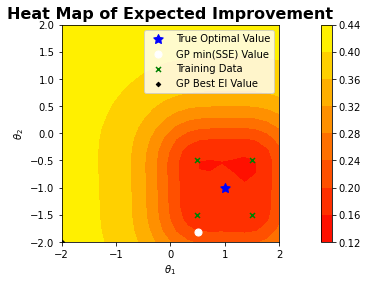

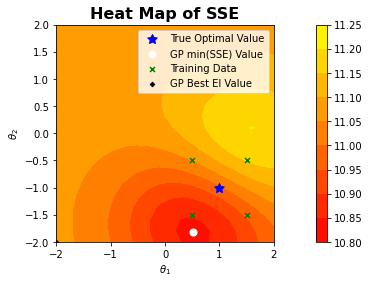

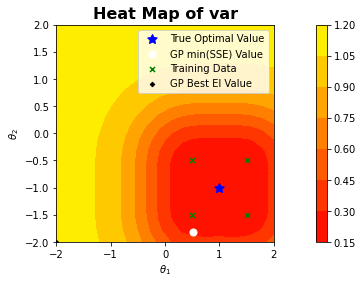

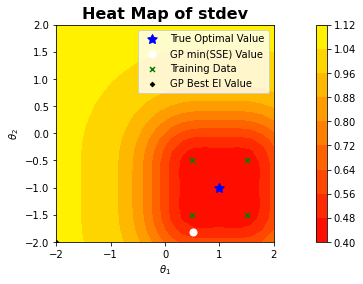

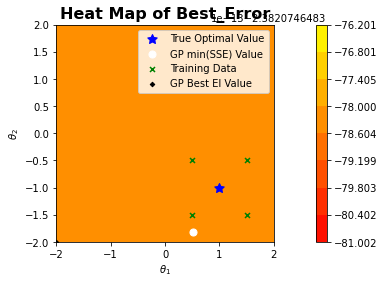

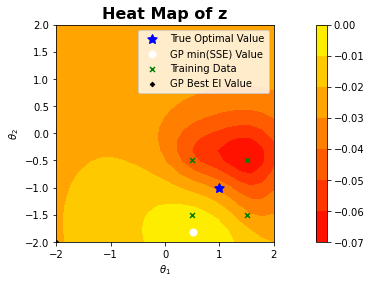

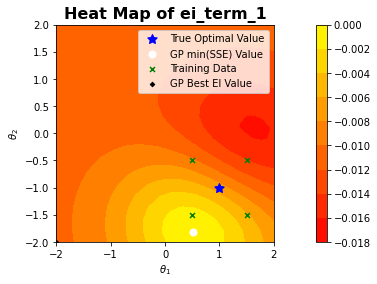

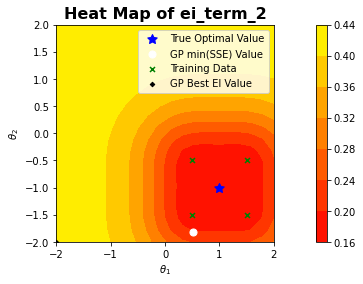

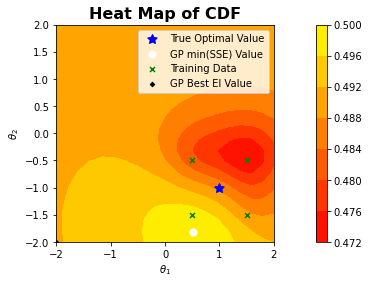

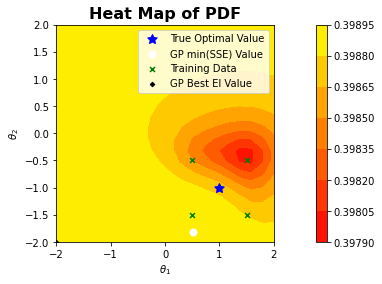

BO Iteration =  2
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.98760187 -1.02065315]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.98586512 -1.02365853]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



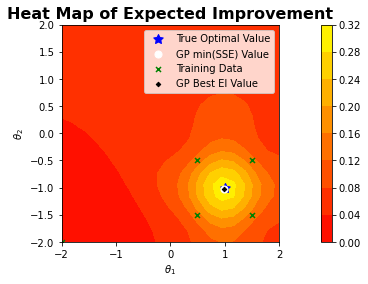

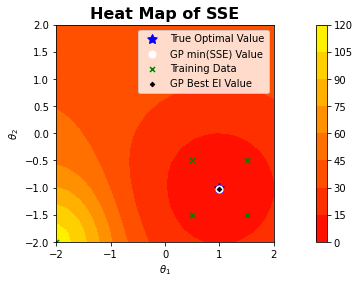

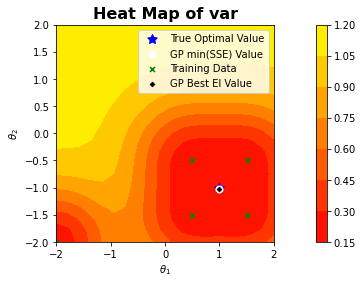

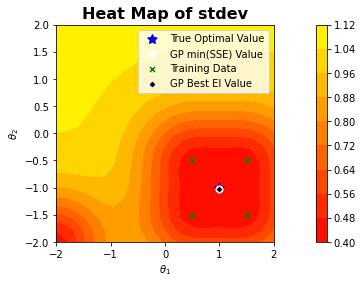

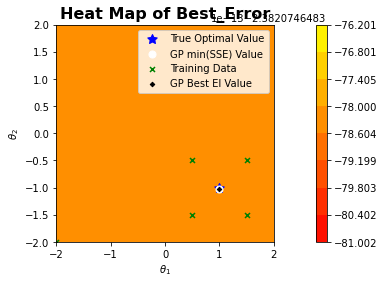

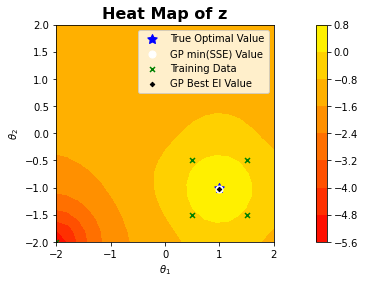

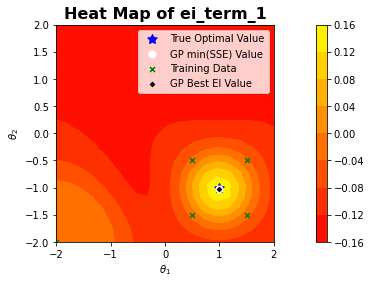

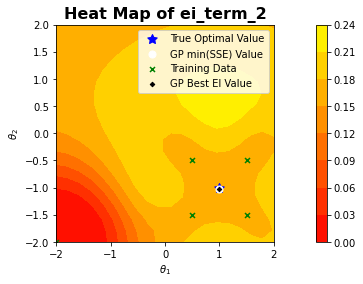

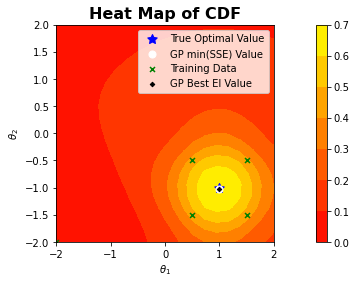

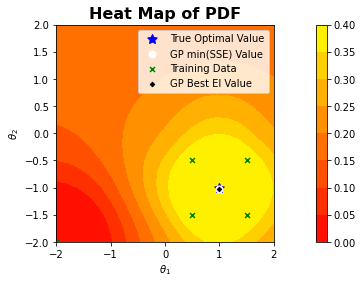

BO Iteration =  3
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [ 0.99053911 -1.01529214]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



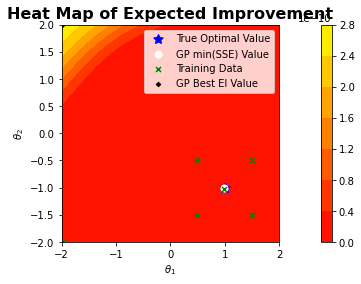

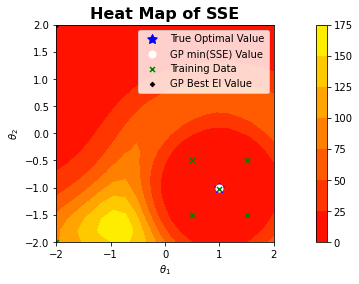

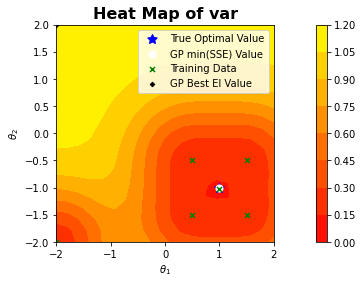

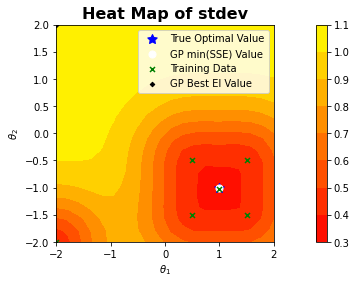

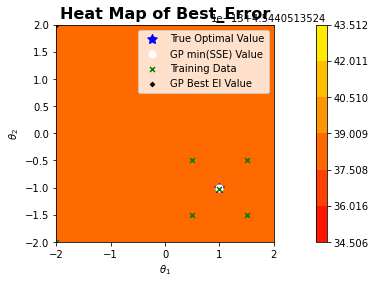

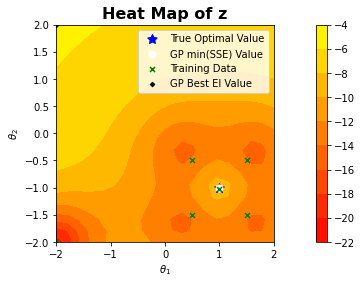

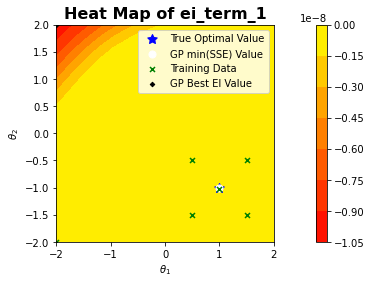

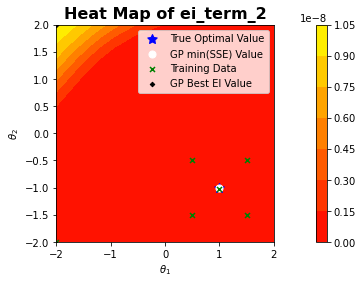

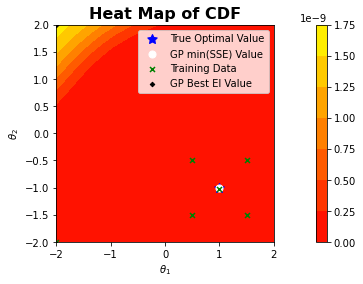

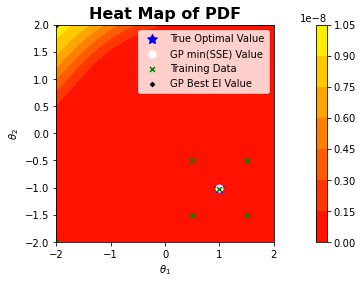

Results (array([-2.,  2.]), array([ 0.99053911, -1.01529214]))


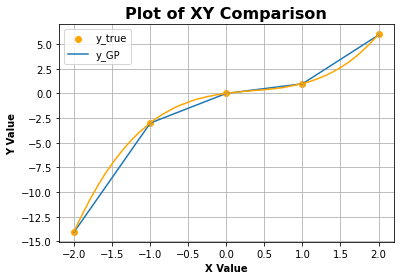

Magnitude of SSE given Theta_Opt =  [ 0.99053911 -1.01529214] is 5.0060e-03
BO Iteration =  1
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [-2. -2.]
Argmax Theta Best =  [-2. -2.]
Scipy Theta Opt =  [ 0.51412647 -1.81713331]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.78947368] 



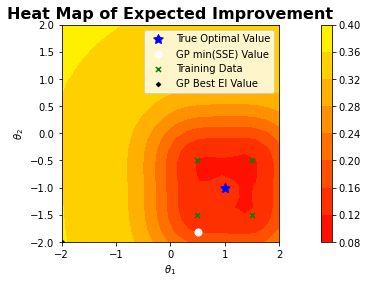

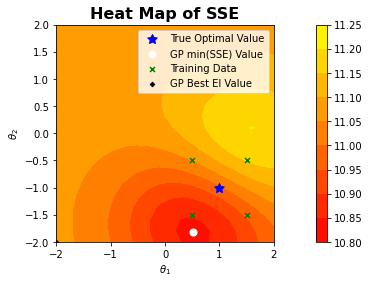

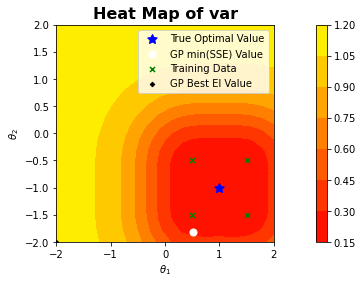

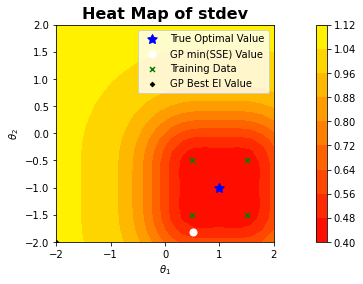

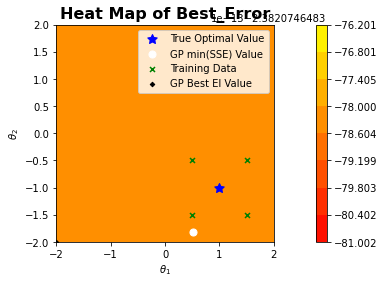

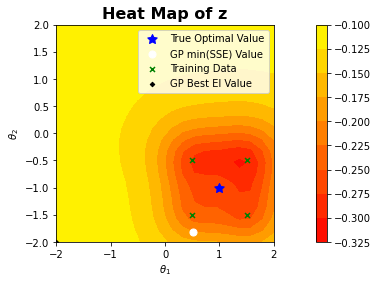

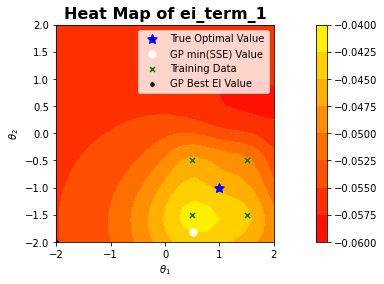

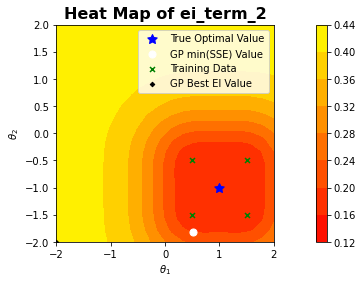

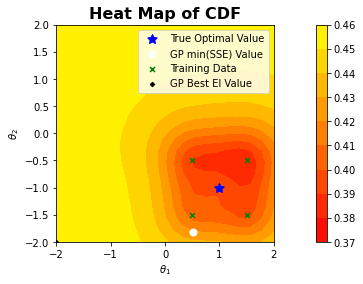

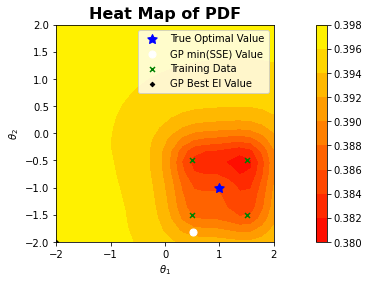

BO Iteration =  2
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.98795987 -1.02003753]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.98586512 -1.02365853]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



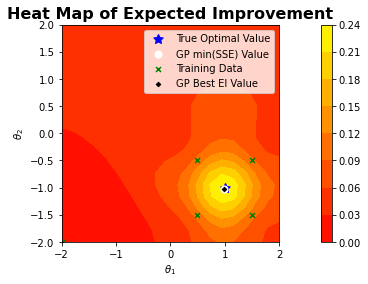

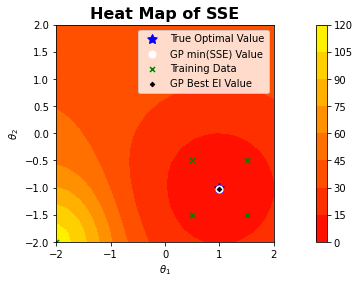

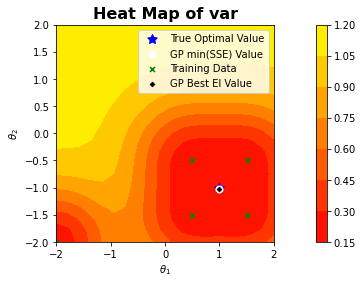

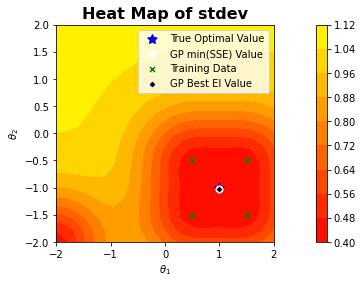

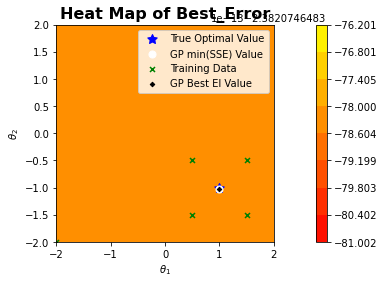

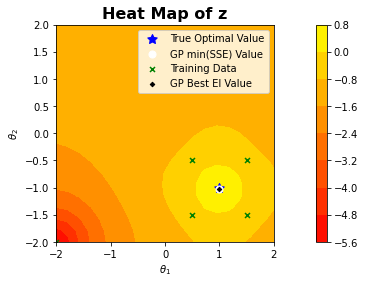

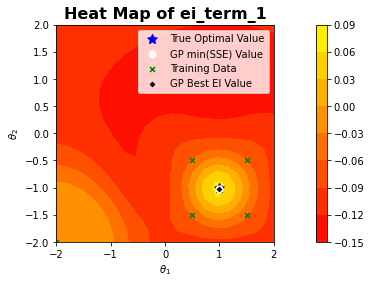

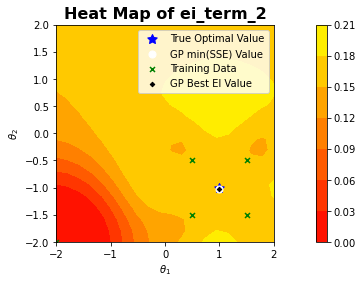

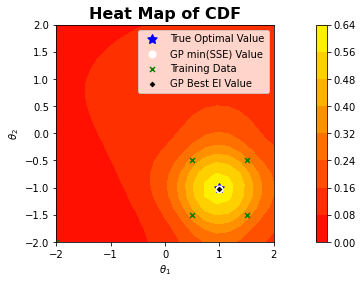

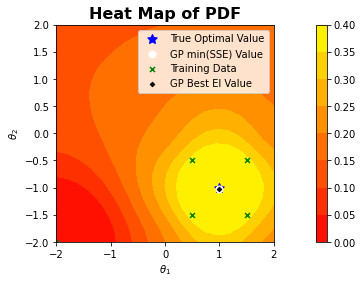

BO Iteration =  3
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [ 0.99075705 -1.01491482]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



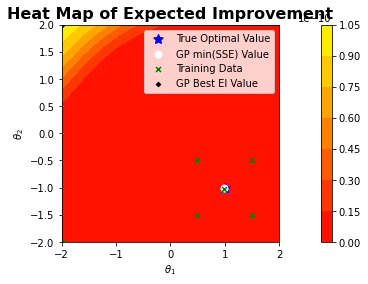

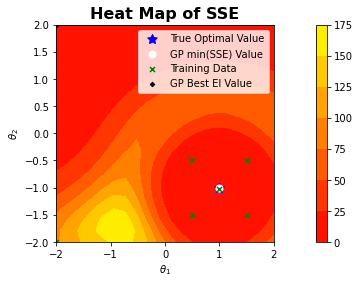

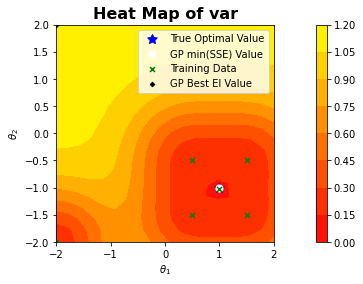

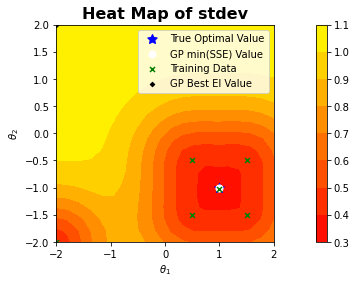

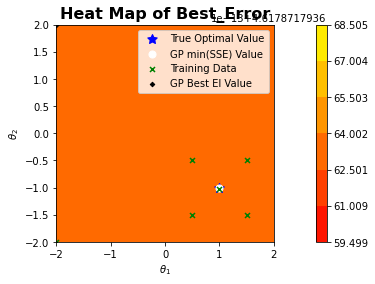

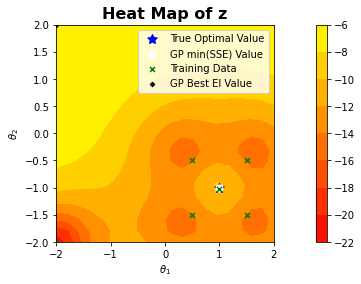

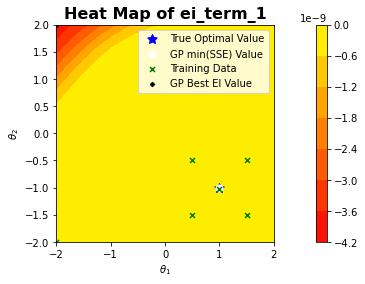

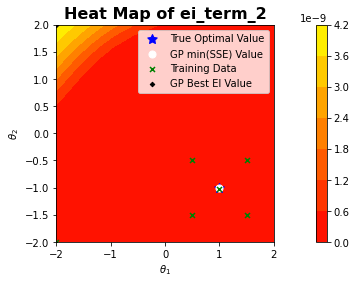

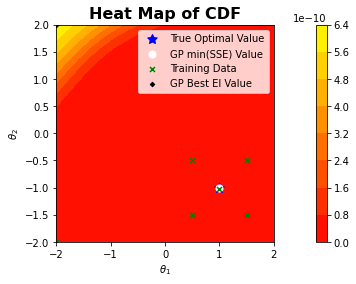

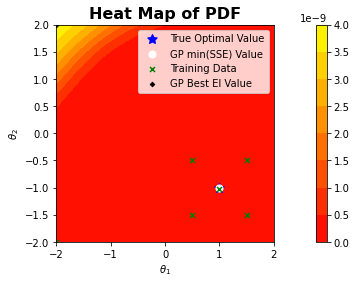

Results (array([-2.,  2.]), array([ 0.99075705, -1.01491482]))


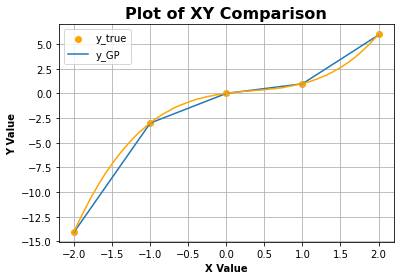

Magnitude of SSE given Theta_Opt =  [ 0.99075705 -1.01491482] is 4.6895e-03
BO Iteration =  1
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [ 0.51412647 -1.81713331]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.78947368] 



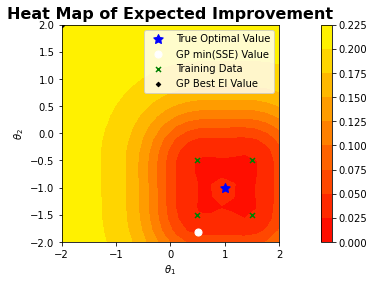

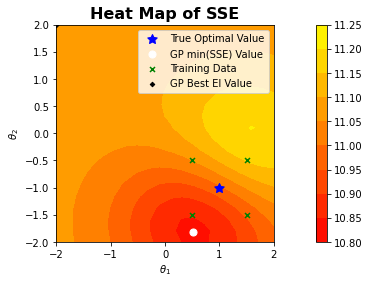

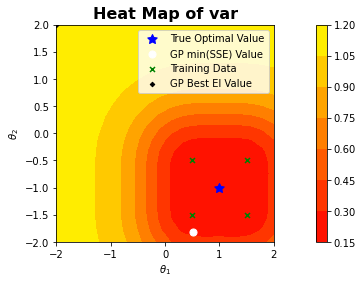

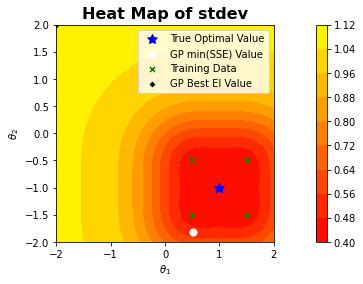

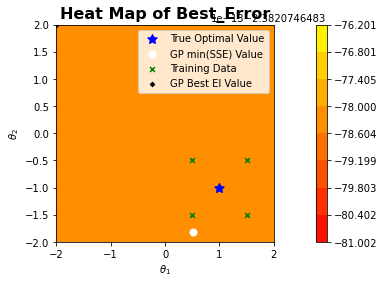

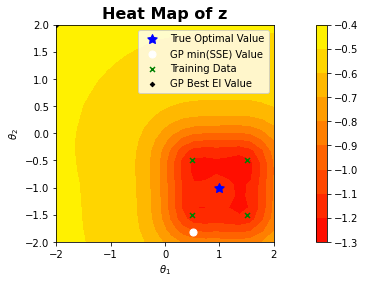

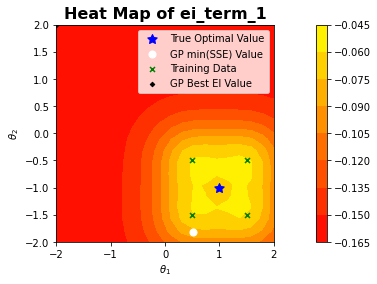

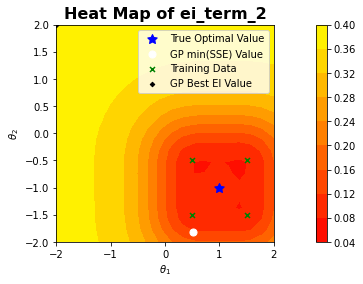

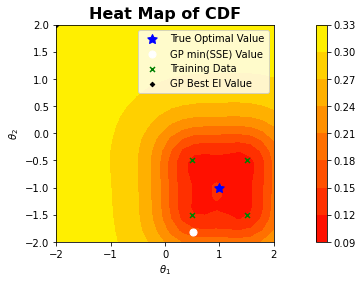

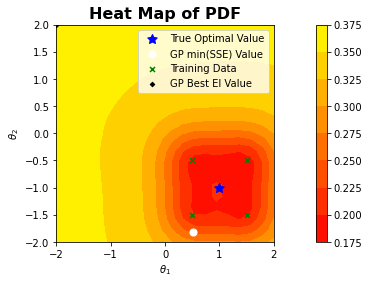

BO Iteration =  2
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.99450366 -1.00937378]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.99347957 -1.01111936]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



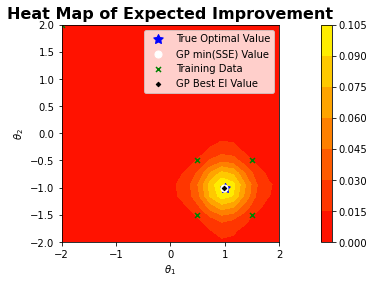

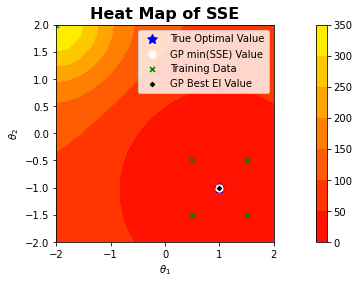

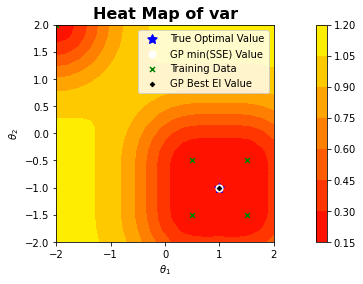

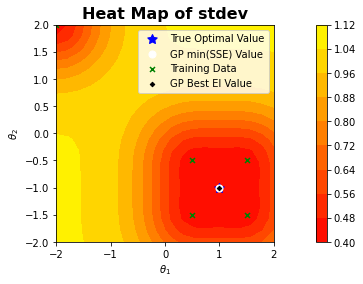

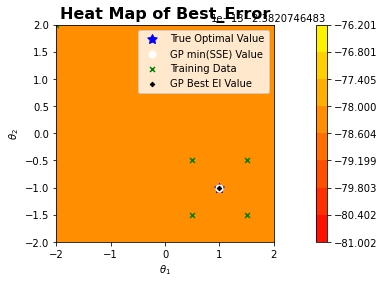

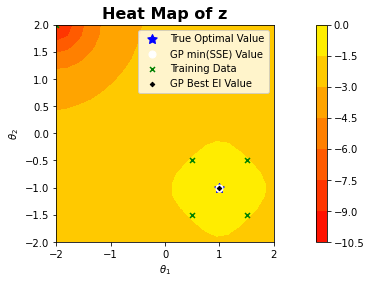

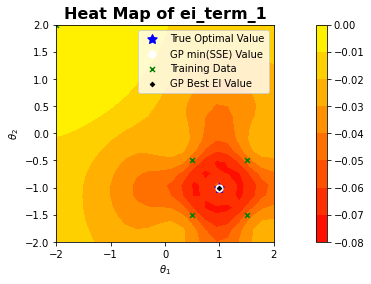

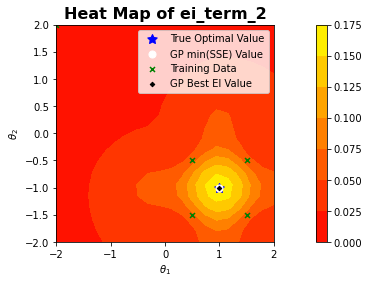

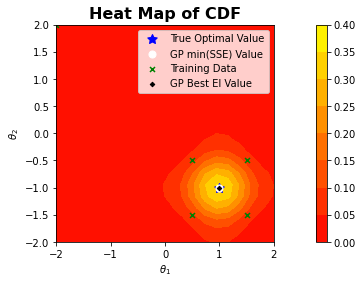

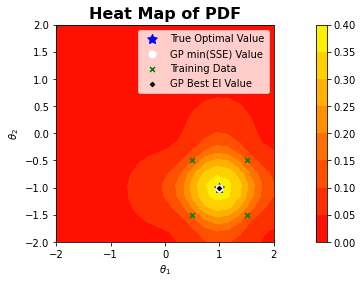

BO Iteration =  3
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [2. 2.]
Argmax Theta Best =  [2. 2.]
Scipy Theta Opt =  [ 0.99591544 -1.0066243 ]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



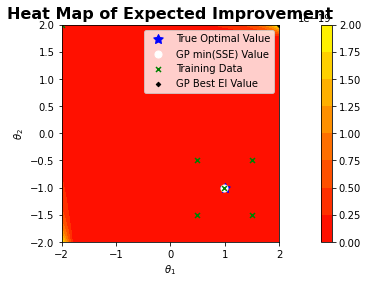

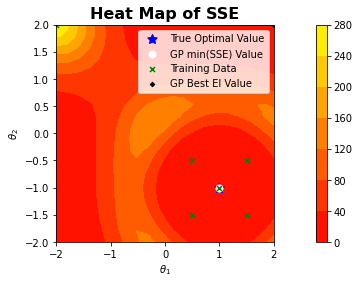

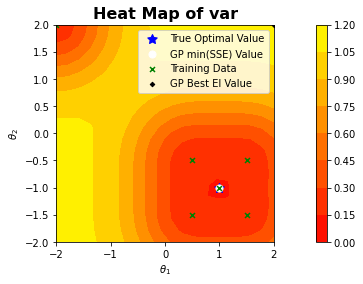

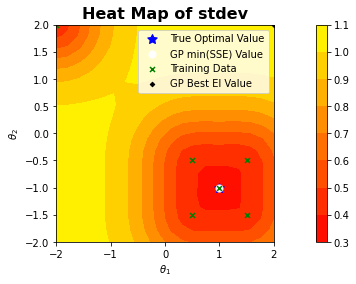

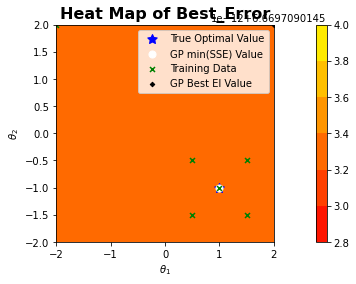

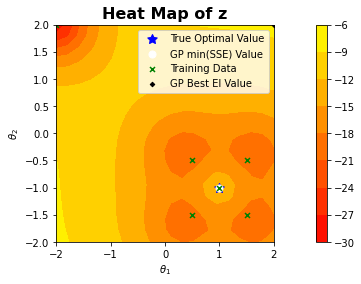

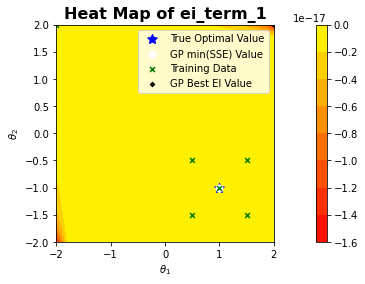

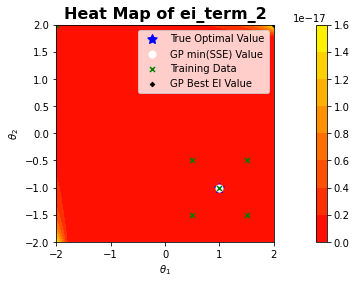

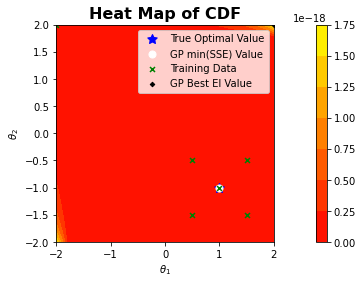

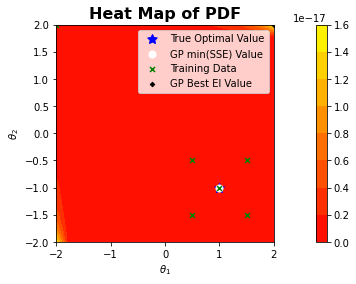

Results (array([2., 2.]), array([ 0.99591544, -1.0066243 ]))


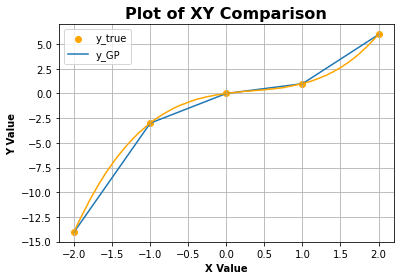

Magnitude of SSE given Theta_Opt =  [ 0.99591544 -1.0066243 ] is 4.3168e-04


In [4]:
##Objective function = ln(SSE)
##USING SCIPY METHOD
##Uses 4 set points
#Note: Doesn't seem to work well on the 4 chosen points. Why?

obj = "LN_obj"
T1_min = np.min(Theta1)
T1_max = np.max(Theta1)
T2_min = np.min(Theta2)
T2_max = np.max(Theta2)
# train_T = torch.tensor([[T1_min,T2_min],[T1_min,T2_max],[T1_max,T2_min],[T1_max,T2_max]])
train_T = torch.tensor(np.array([[0.5,-1.5],[0.5,-0.5],[1.5,-1.5],[1.5,-0.5]]))
train_ln_sse = create_sse_data(q,train_T,Xexp,Yexp, obj)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_ln_sse, likelihood)

for i in range(len(explore_bias)):
    BO_Results =  bo_iter(BO_iters, train_T, train_ln_sse, p,q, theta_mesh, Theta_True, iterations, explore_bias[i], Xexp, Yexp,obj, verbose)
    print("Results",BO_Results)
    
    q_y = 3
    y_GP_input = np.zeros((n,3))
    for j in range(n):
        y_GP_input[j] = np.array([BO_Results[1][0],BO_Results[1][1],Xexp[j]])

    X_line = np.linspace(-2,2,100)
    y_true = calc_y_exp(Theta_True, X_line, noise_std, noise_mean=0)

    y_GP_Opt = create_y_data(q_y,y_GP_input)

    title = "XY Comparison"
    plot_xy(X_line,Xexp, Yexp, y_GP_Opt,y_true,title)

    Error_mag = np.sum((y_GP_Opt-Yexp)**2)
    print("Magnitude of SSE given Theta_Opt = ",BO_Results[1], "is", "{:.4e}".format(Error_mag))

BO Iteration =  1
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 1.17197583 -1.51532935]
Argmax Theta Best =  [ 1.15789474 -1.57894737]
Scipy Theta Opt =  [ 1.17966629 -1.32956099]
Argmin Theta_Opt_GP =  [ 1.15789474 -1.36842105] 



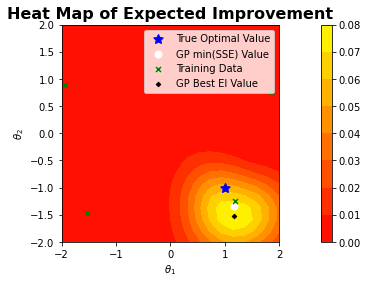

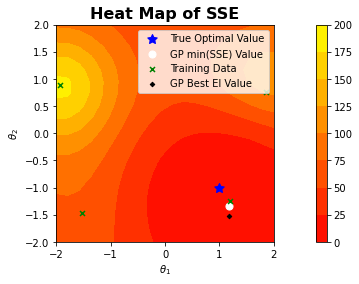

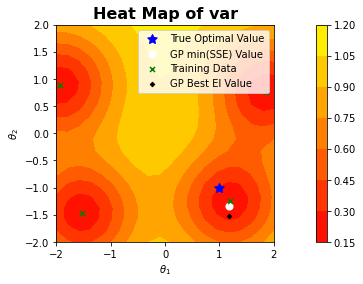

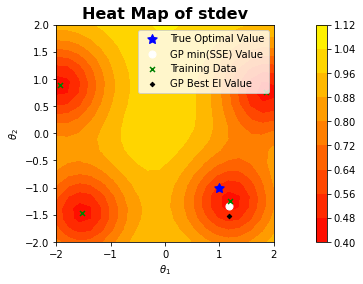

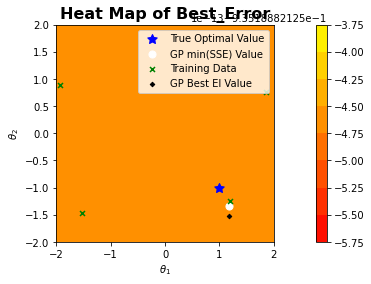

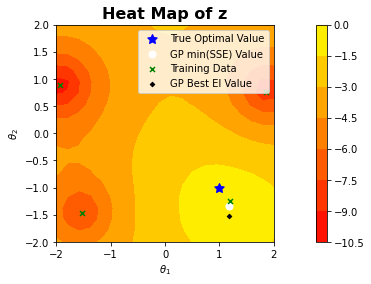

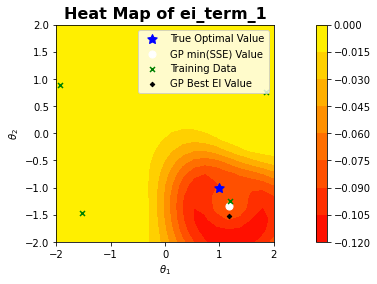

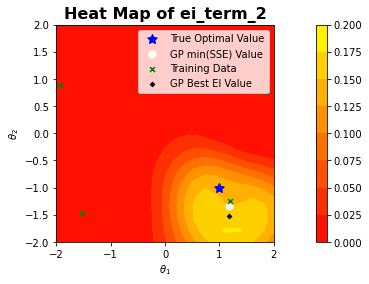

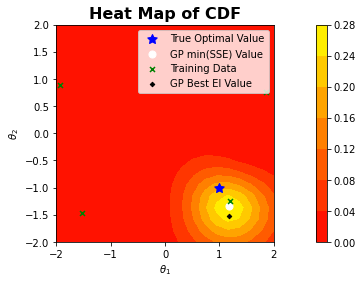

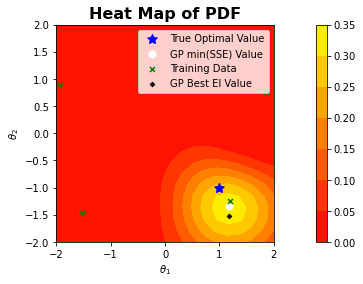

BO Iteration =  2
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.98524864 -0.80937823]
Argmax Theta Best =  [ 0.94736842 -0.73684211]
Scipy Theta Opt =  [ 1.18315718 -1.0366083 ]
Argmin Theta_Opt_GP =  [ 1.15789474 -0.94736842] 



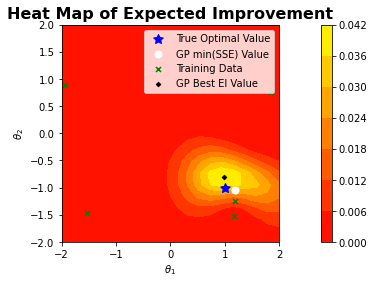

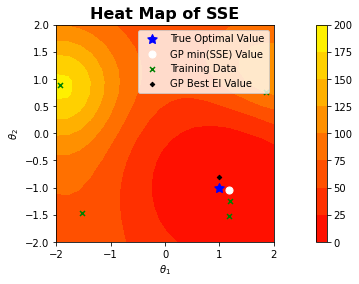

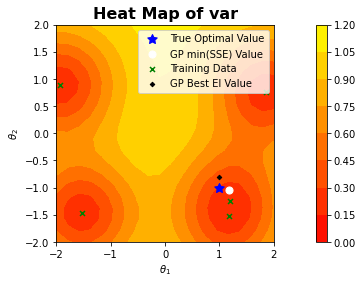

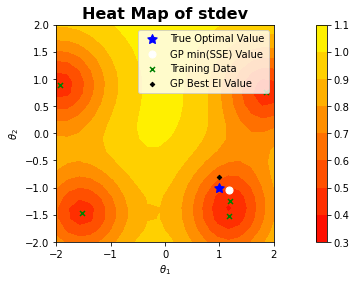

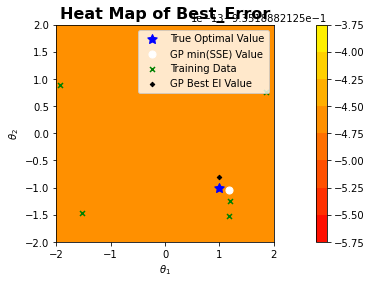

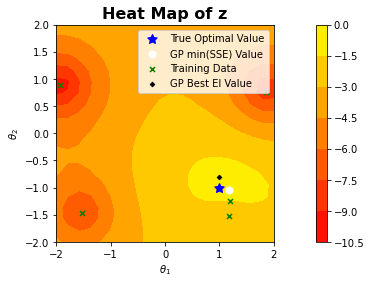

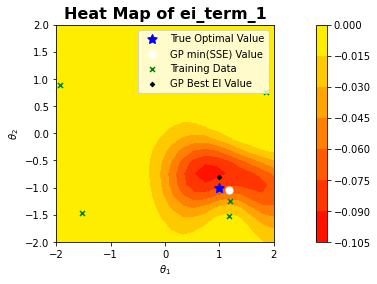

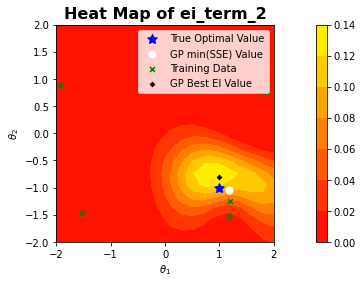

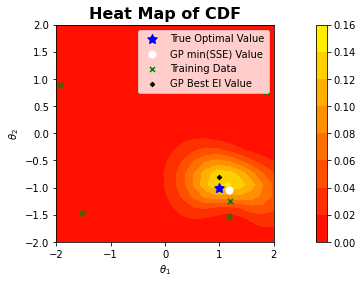

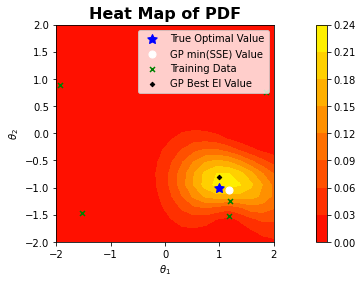

BO Iteration =  3
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.78821941 -0.6831065 ]
Argmax Theta Best =  [ 0.73684211 -0.73684211]
Scipy Theta Opt =  [ 0.92933224 -0.74678806]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.73684211] 



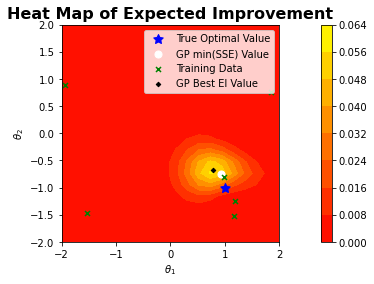

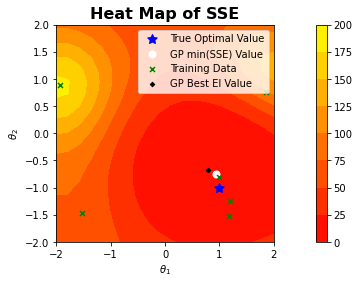

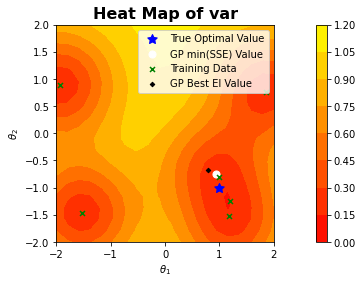

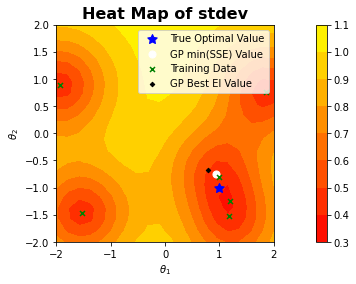

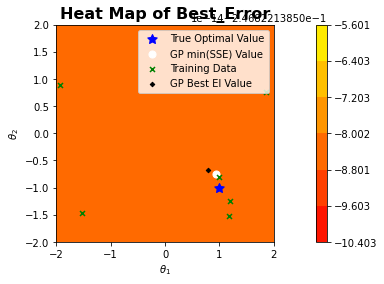

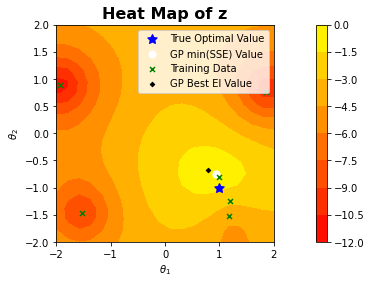

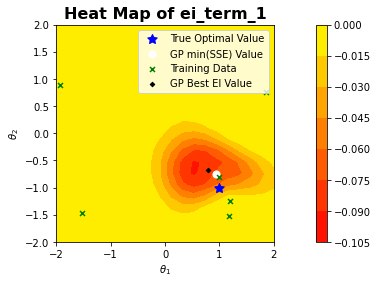

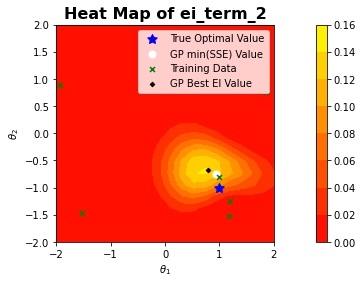

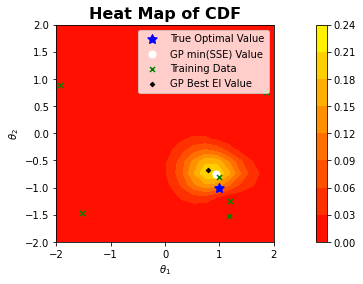

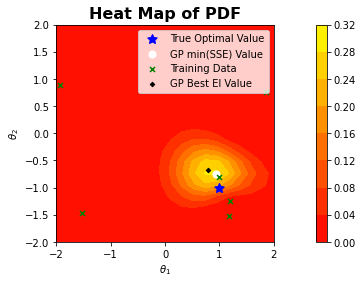

Results (array([ 0.78821941, -0.6831065 ]), array([ 0.92933224, -0.74678806]))


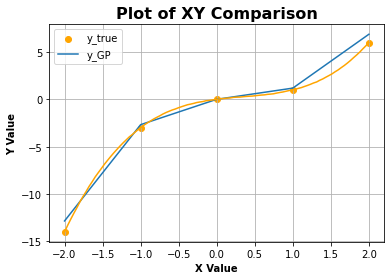

Magnitude of SSE given Theta_Opt =  [ 0.92933224 -0.74678806] is 2.2798e+00
BO Iteration =  1
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 1.17755474 -1.57262716]
Argmax Theta Best =  [ 1.15789474 -1.57894737]
Scipy Theta Opt =  [ 1.17966629 -1.32956099]
Argmin Theta_Opt_GP =  [ 1.15789474 -1.36842105] 



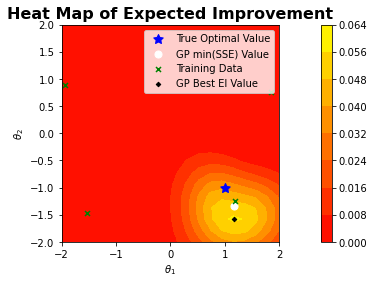

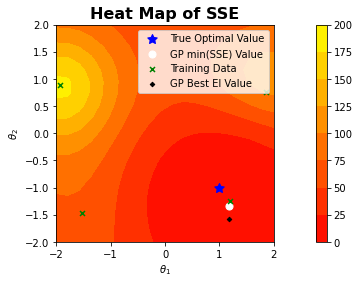

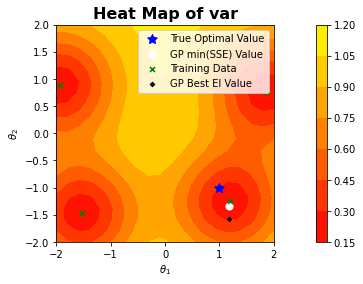

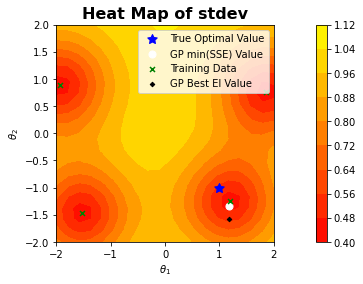

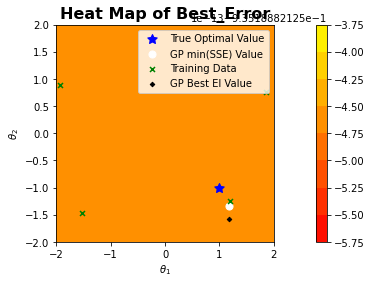

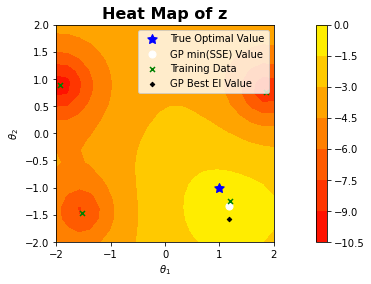

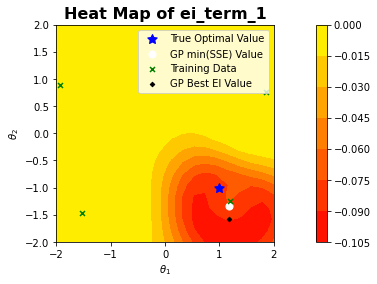

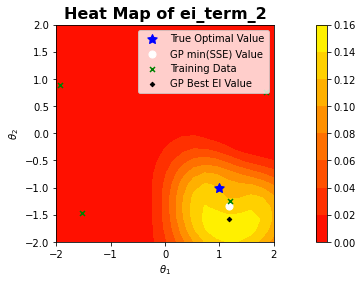

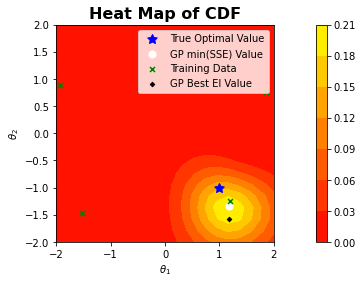

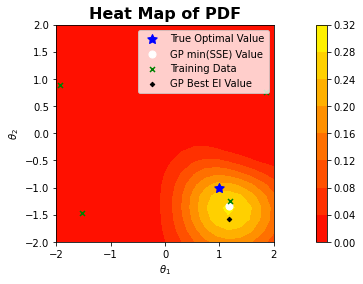

BO Iteration =  2
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.96950601 -0.77639632]
Argmax Theta Best =  [ 0.94736842 -0.73684211]
Scipy Theta Opt =  [ 1.16969269 -0.97914632]
Argmin Theta_Opt_GP =  [ 1.15789474 -0.94736842] 



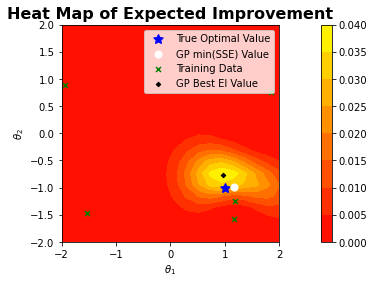

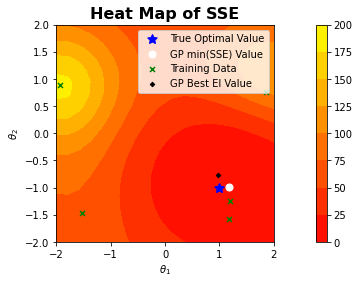

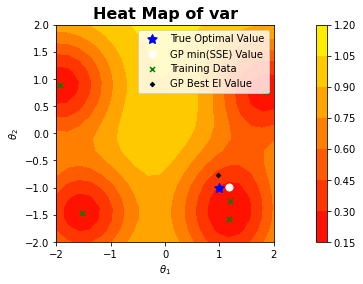

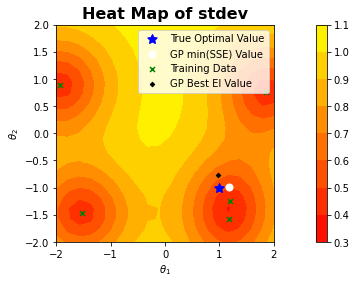

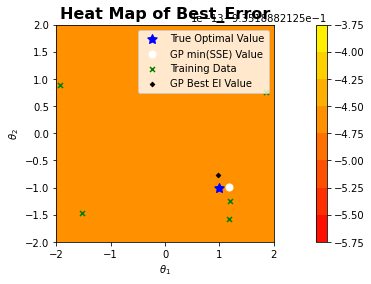

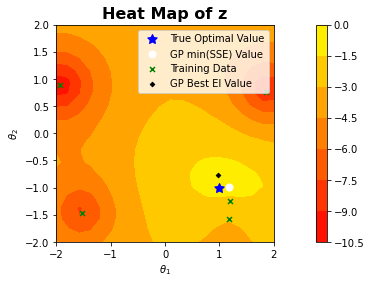

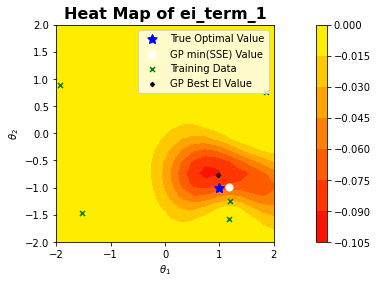

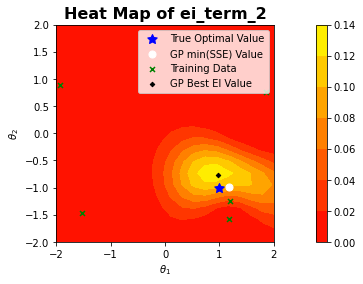

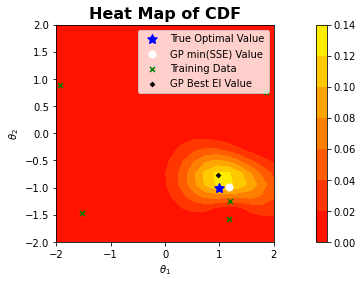

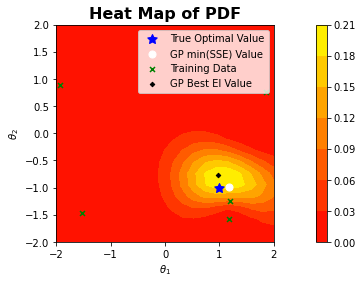

BO Iteration =  3
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.84594425 -0.72630978]
Argmax Theta Best =  [ 0.94736842 -0.73684211]
Scipy Theta Opt =  [ 0.97330546 -0.78149567]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.73684211] 



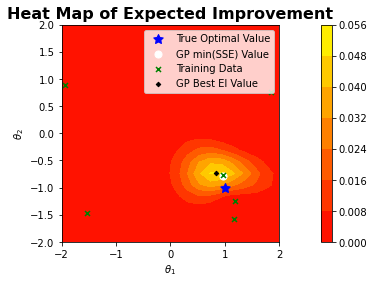

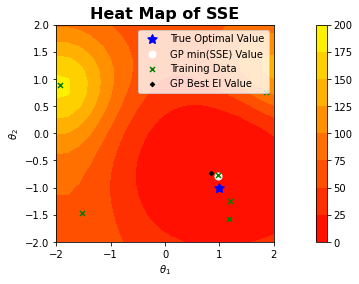

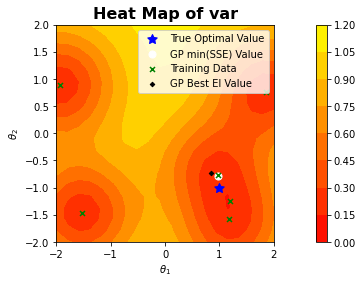

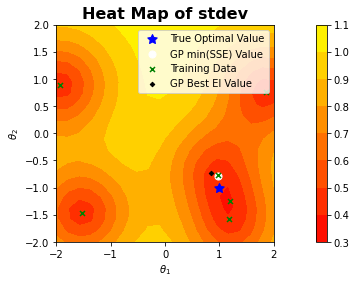

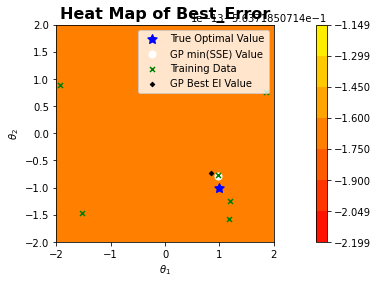

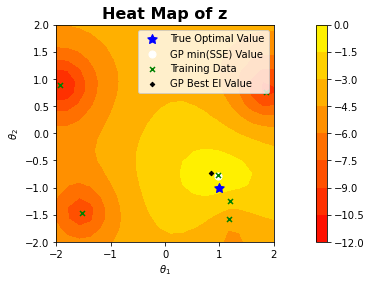

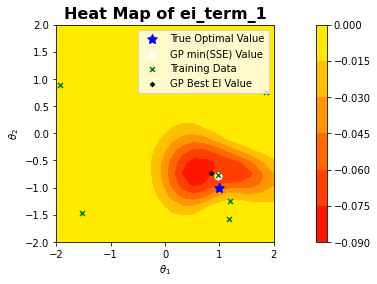

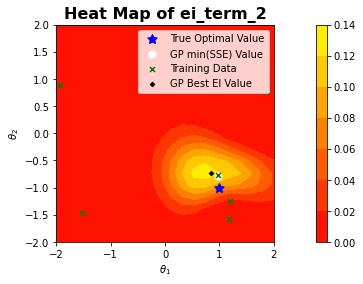

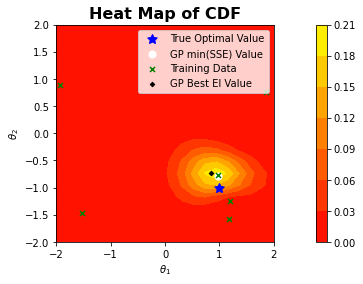

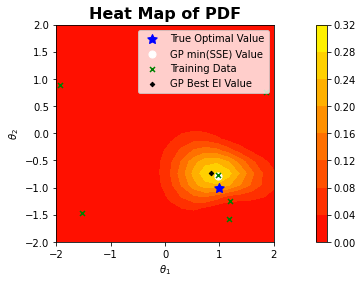

Results (array([ 0.84594425, -0.72630978]), array([ 0.97330546, -0.78149567]))


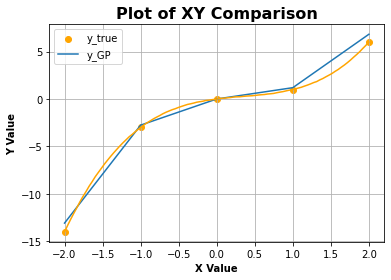

Magnitude of SSE given Theta_Opt =  [ 0.97330546 -0.78149567] is 1.6777e+00
BO Iteration =  1
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 1.22474277 -1.7810141 ]
Argmax Theta Best =  [ 1.15789474 -1.78947368]
Scipy Theta Opt =  [ 1.17966629 -1.32956099]
Argmin Theta_Opt_GP =  [ 1.15789474 -1.36842105] 



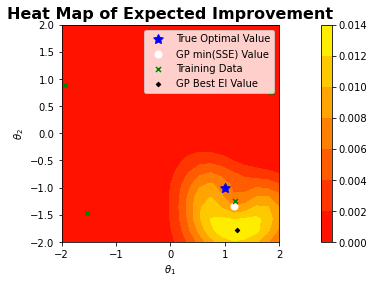

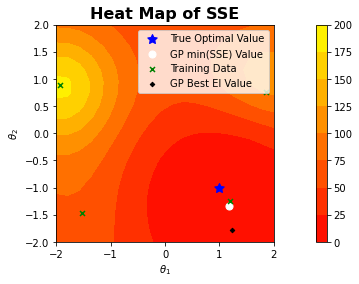

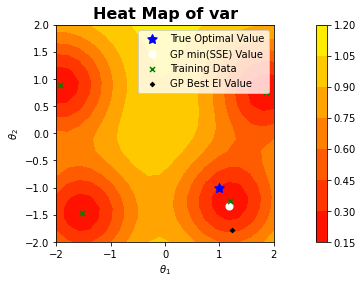

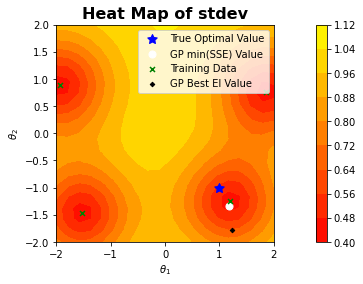

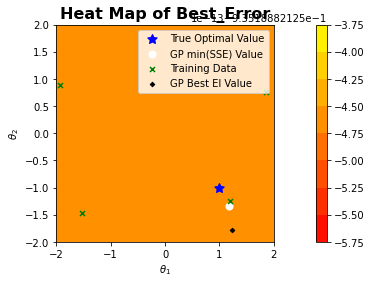

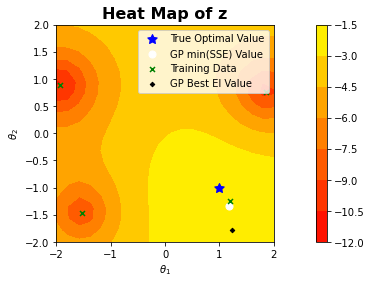

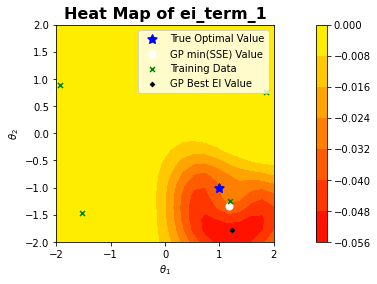

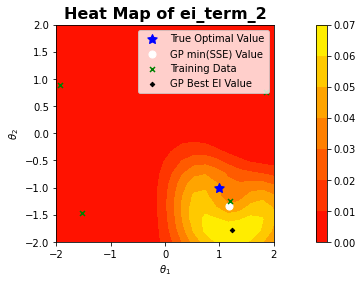

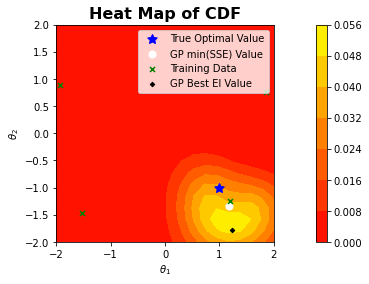

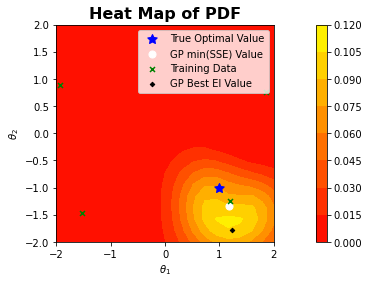

BO Iteration =  2
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.86264246 -0.74391392]
Argmax Theta Best =  [ 0.94736842 -0.73684211]
Scipy Theta Opt =  [ 1.11478665 -0.91112895]
Argmin Theta_Opt_GP =  [ 1.15789474 -0.94736842] 



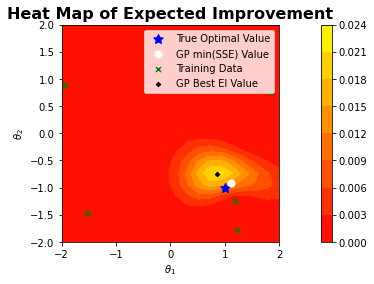

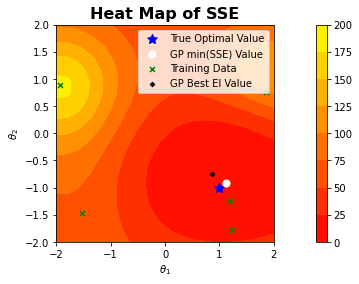

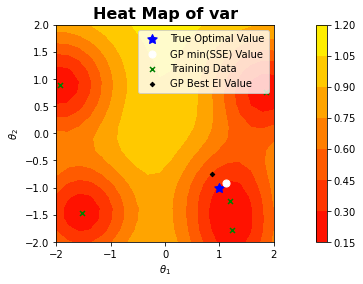

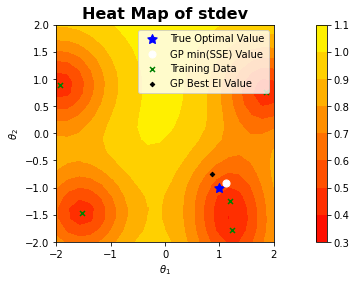

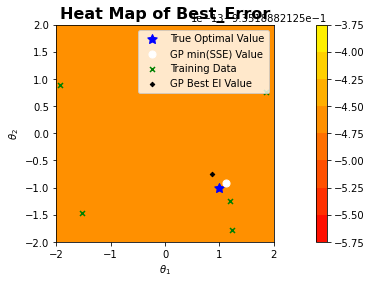

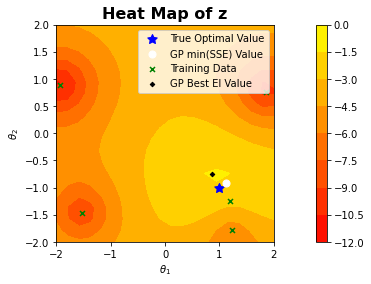

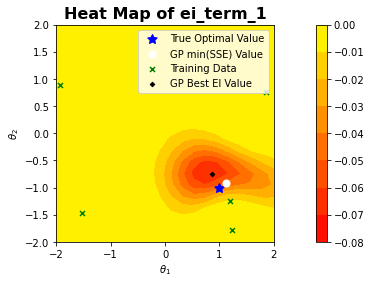

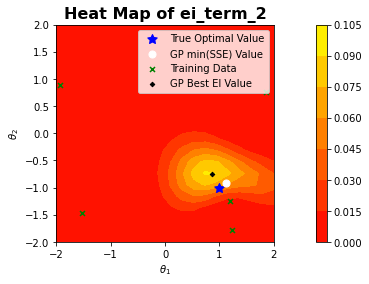

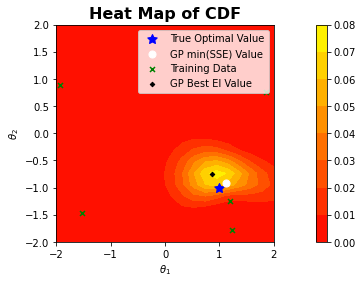

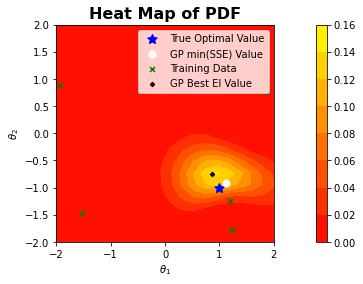

BO Iteration =  3
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 1.20920394 -0.76764758]
Argmax Theta Best =  [ 1.15789474 -0.73684211]
Scipy Theta Opt =  [ 0.99862956 -0.83887002]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.73684211] 



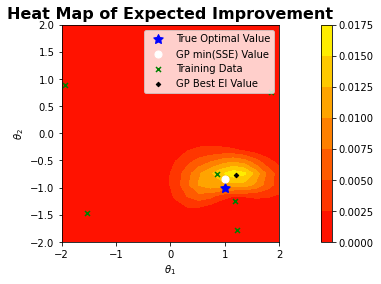

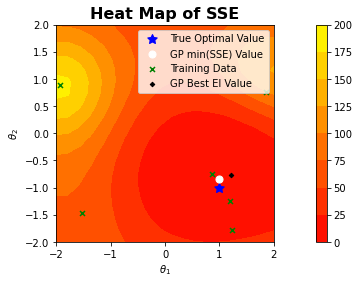

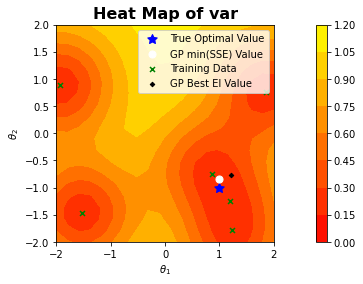

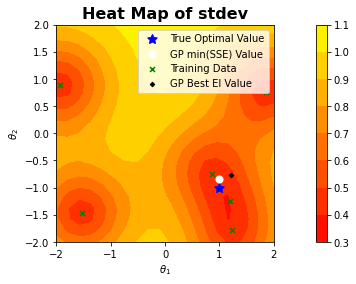

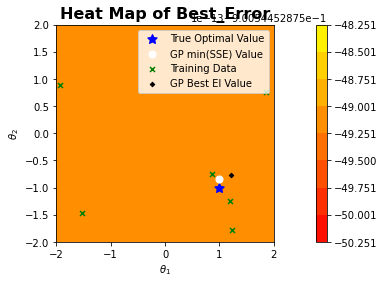

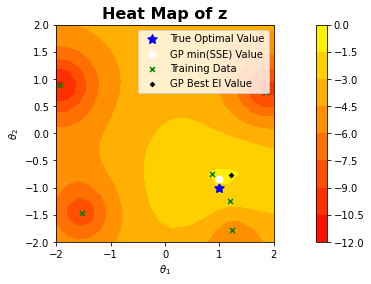

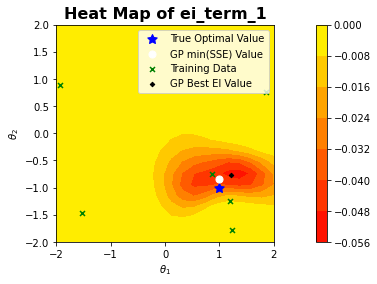

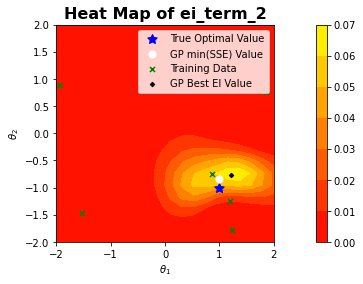

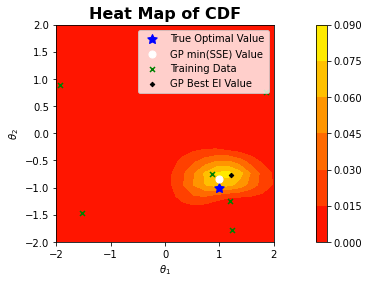

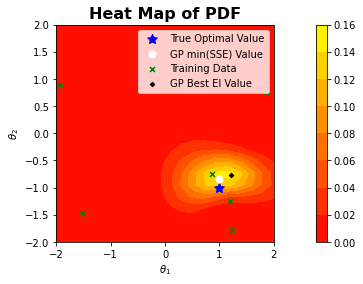

Results (array([ 1.20920394, -0.76764758]), array([ 0.99862956, -0.83887002]))


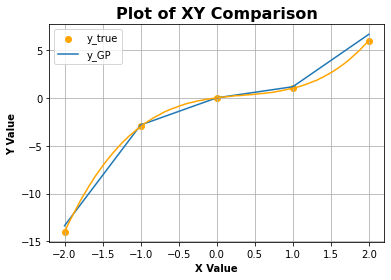

Magnitude of SSE given Theta_Opt =  [ 0.99862956 -0.83887002] is 9.1998e-01


In [5]:
##Objective function = ln(SSE)
##USING SCIPY METHOD
##Uses 4 LHS points
#Note: Doesn't seem to work well on the 4 chosen points. Why?

obj = "LN_obj"

#Pull training data from CSV
train_data_doc = "train_2_in_ln_obj_data.csv"
train_data = np.array(pd.read_csv(train_data_doc, header=0,sep=","))
train_T = torch.tensor(train_data[:,1:3])
train_ln_sse = torch.tensor(train_data[:,3])
t =len(train_T) #Desired number of training points
t = 4 #Set t=5 to show changing EI
train_T = train_T[0:t]
train_ln_sse = train_ln_sse[0:t]

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_ln_sse, likelihood)

for i in range(len(explore_bias)):
    BO_Results =  bo_iter(BO_iters, train_T, train_ln_sse, p,q, theta_mesh, Theta_True, iterations, explore_bias[i], Xexp, Yexp,obj, verbose)
    print("Results",BO_Results)
    
    q_y = 3
    y_GP_input = np.zeros((n,3))
    for j in range(n):
        y_GP_input[j] = np.array([BO_Results[1][0],BO_Results[1][1],Xexp[j]])

    X_line = np.linspace(-2,2,100)
    y_true = calc_y_exp(Theta_True, X_line, noise_std, noise_mean=0)

    y_GP_Opt = create_y_data(q_y,y_GP_input)

    title = "XY Comparison"
    plot_xy(X_line,Xexp, Yexp, y_GP_Opt,y_true,title)

    Error_mag = np.sum((y_GP_Opt-Yexp)**2)
    print("Magnitude of SSE given Theta_Opt = ",BO_Results[1], "is", "{:.4e}".format(Error_mag))

BO Iteration =  1
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [-2.  2.]
Argmin Theta_Opt_GP =  [-2.  2.] 



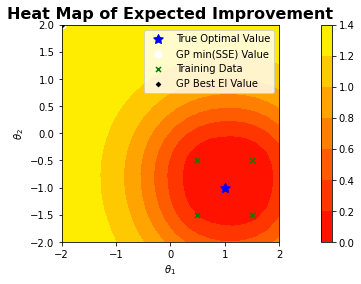

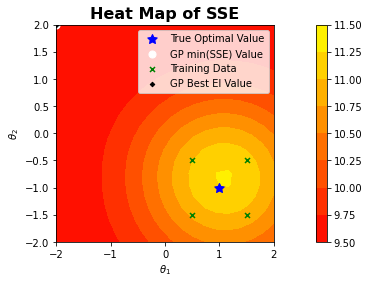

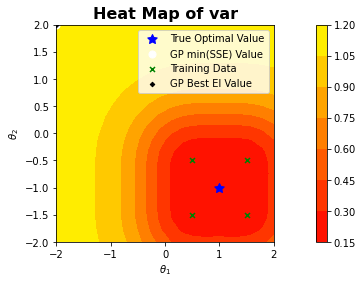

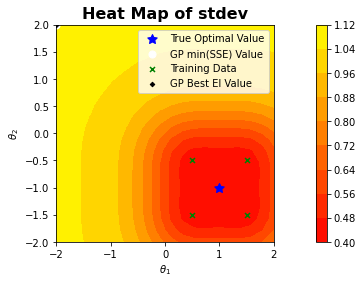

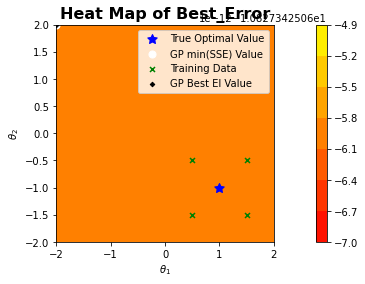

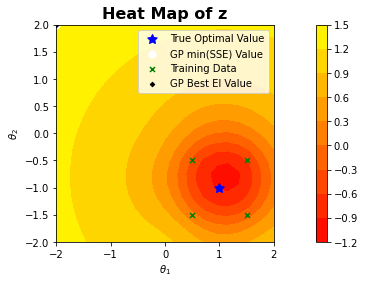

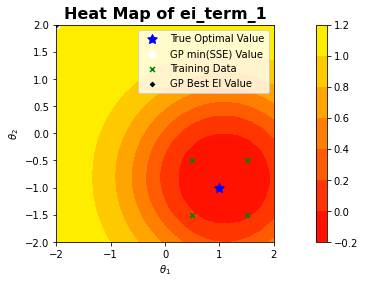

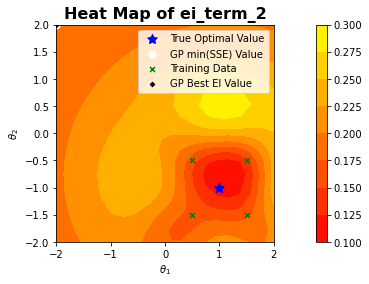

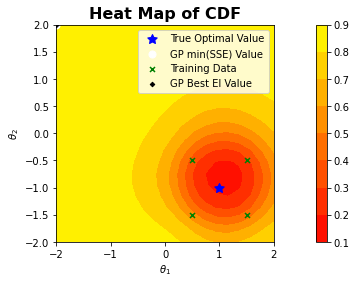

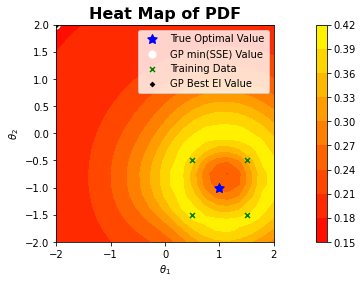

BO Iteration =  2
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.91329602 -1.00314719]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.91232989 -1.00319066]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



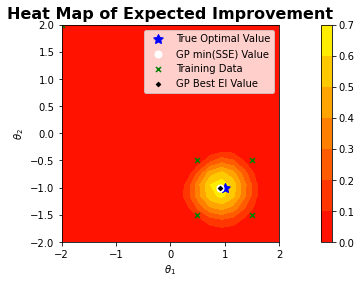

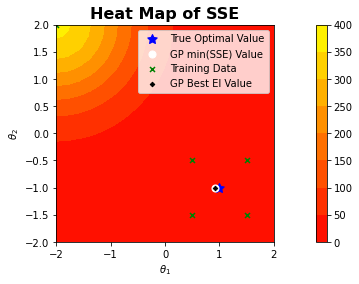

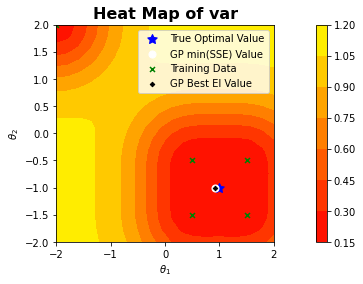

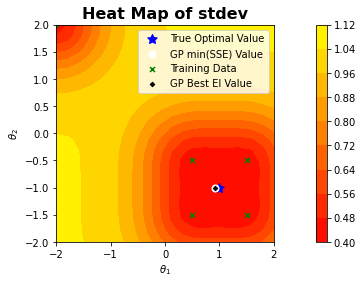

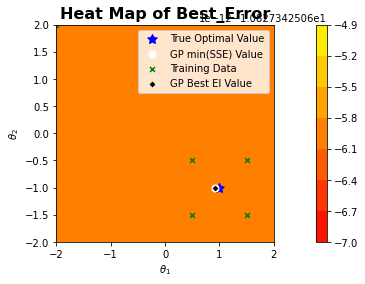

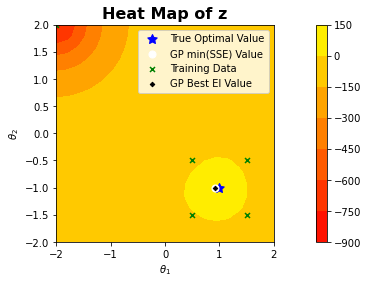

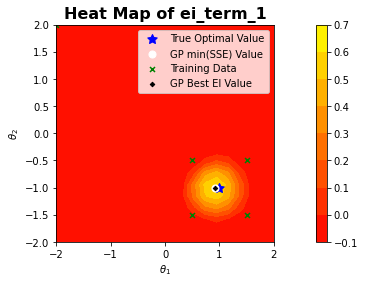

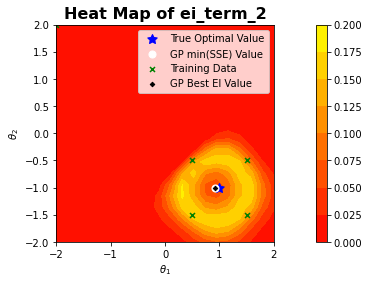

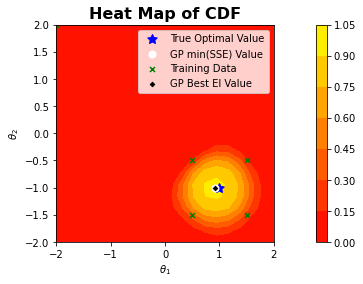

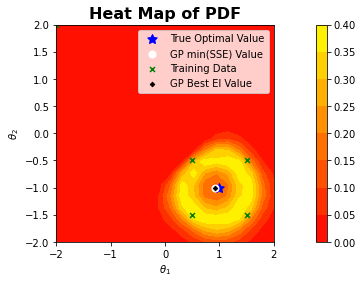

BO Iteration =  3
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.94736842 -0.94736842]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.94459658 -1.00196579]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



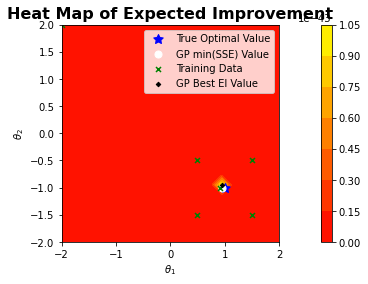

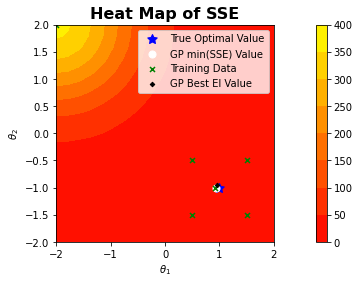

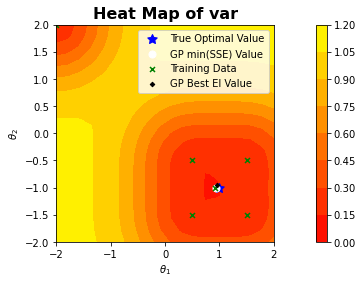

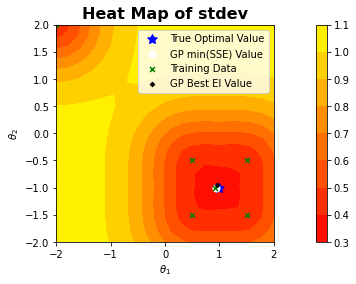

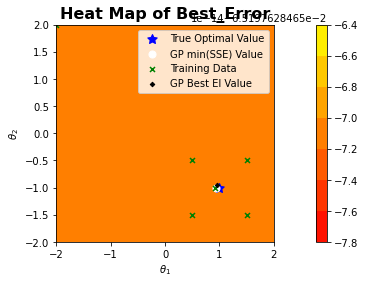

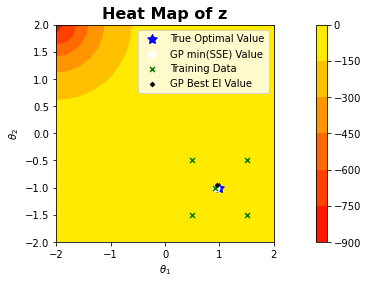

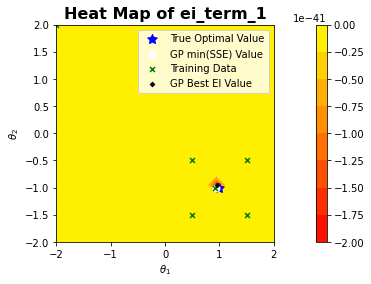

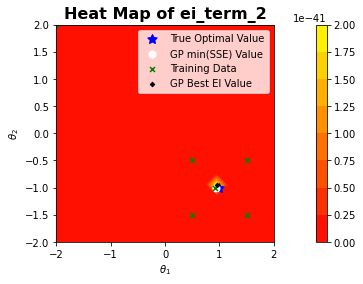

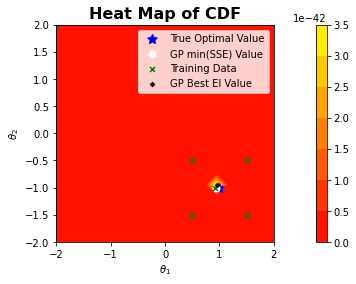

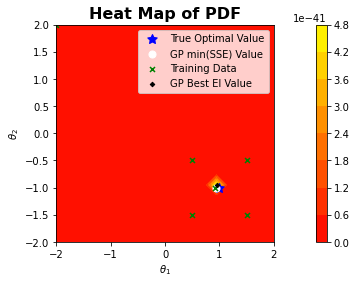

(array([ 0.94736842, -0.94736842]), array([ 0.94459658, -1.00196579]))


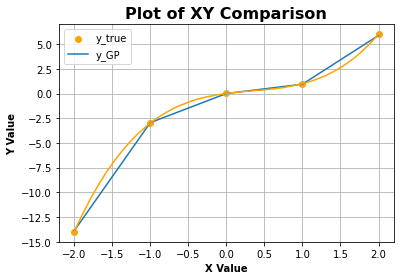

Magnitude of SSE given Theta_Opt =  [ 0.94459658 -1.00196579] is 2.4523e-02
BO Iteration =  1
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [-2.  2.]
Argmin Theta_Opt_GP =  [-2.  2.] 



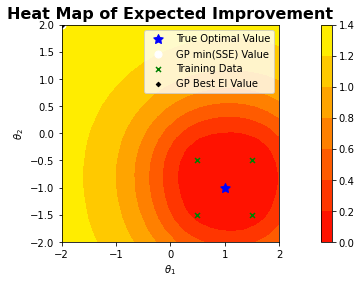

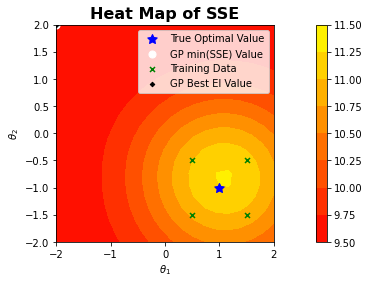

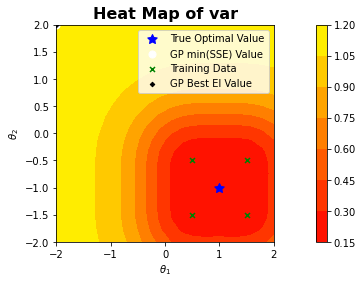

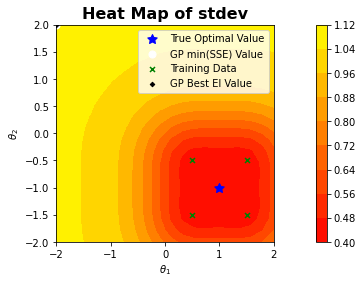

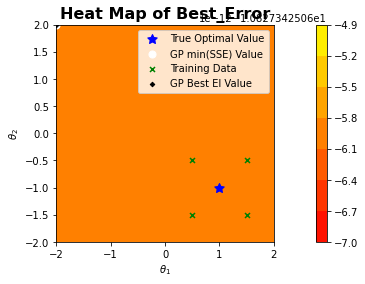

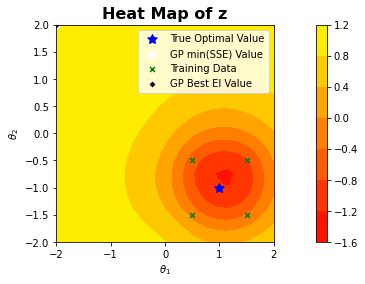

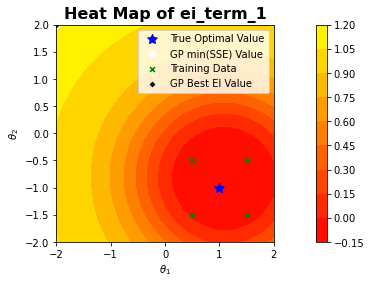

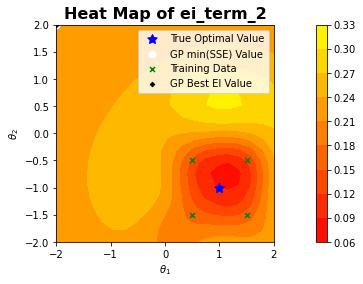

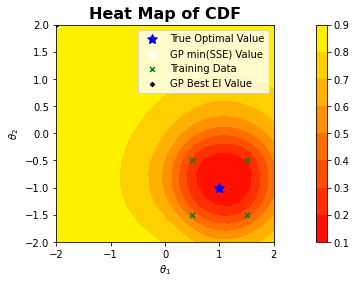

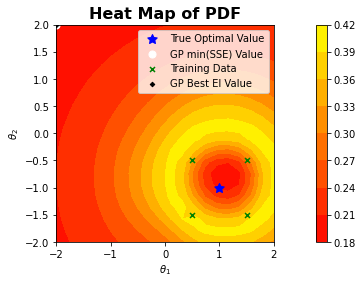

BO Iteration =  2
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.91369547 -1.00312916]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.91232989 -1.00319066]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



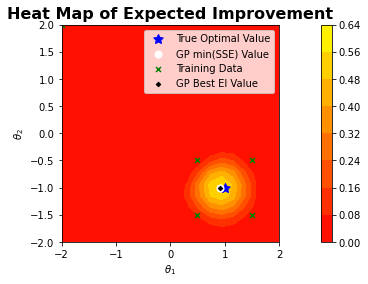

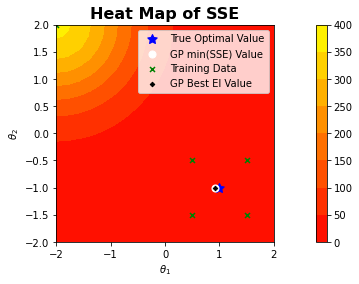

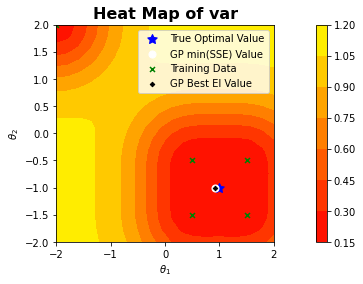

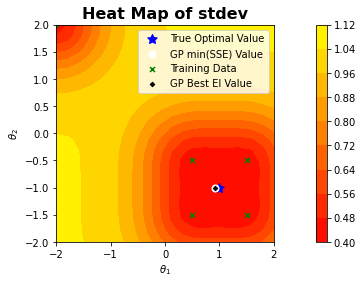

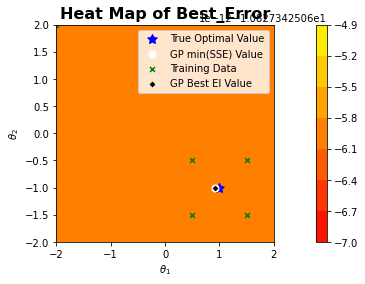

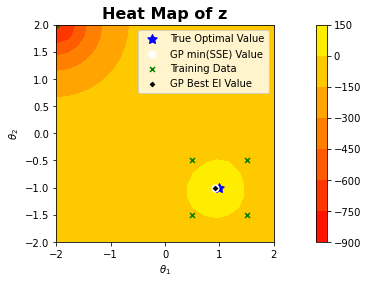

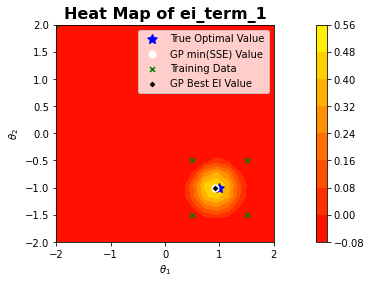

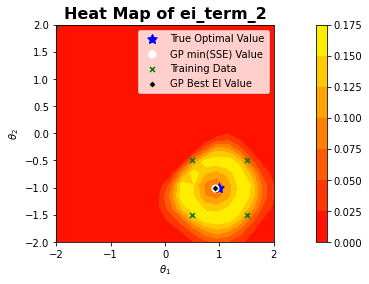

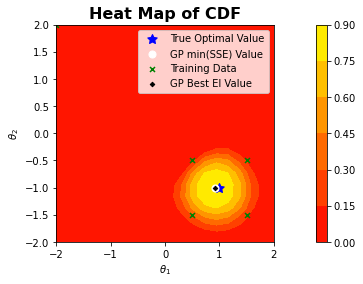

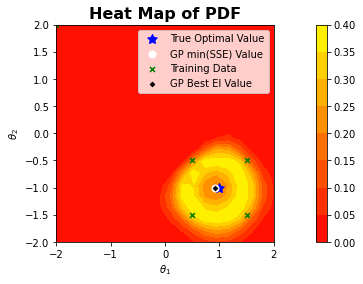

BO Iteration =  3
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.94736842 -0.94736842]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.94478025 -1.00195821]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



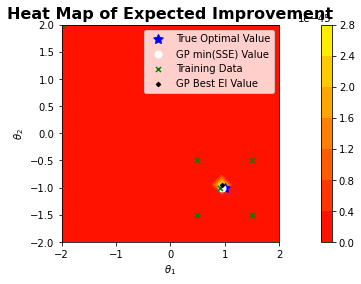

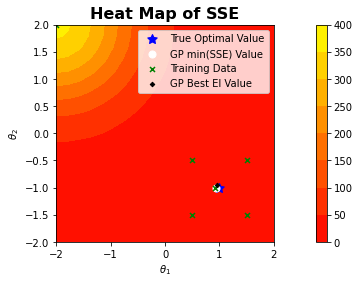

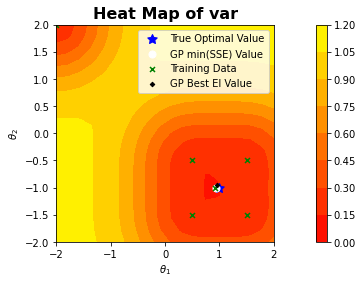

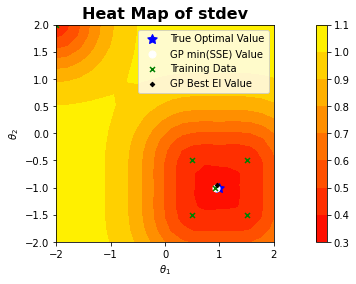

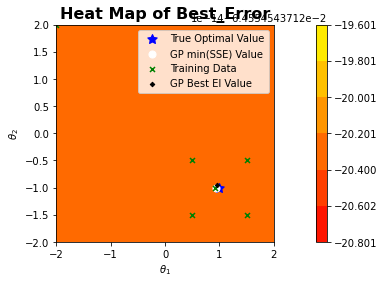

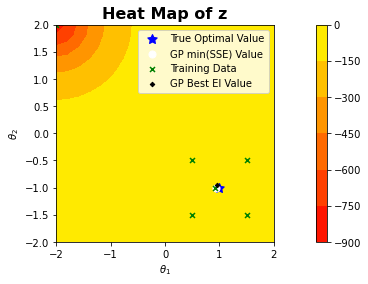

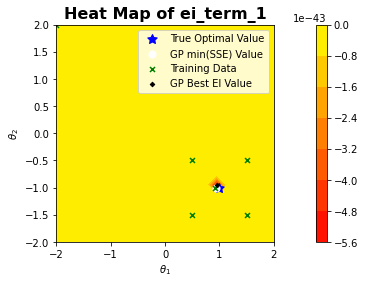

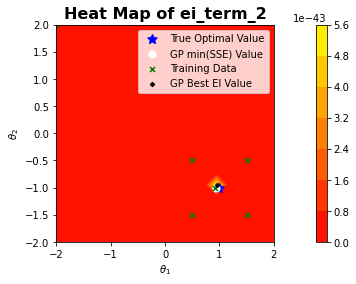

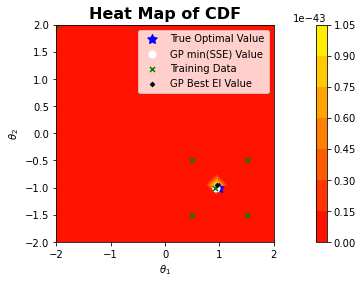

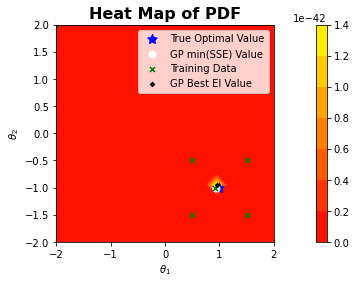

(array([ 0.94736842, -0.94736842]), array([ 0.94478025, -1.00195821]))


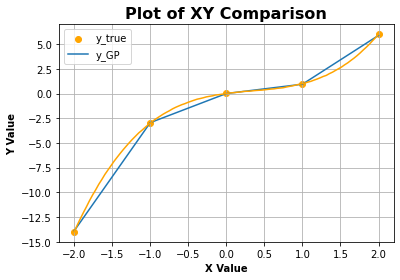

Magnitude of SSE given Theta_Opt =  [ 0.94478025 -1.00195821] is 2.4342e-02
BO Iteration =  1
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [-2.  2.]
Argmax Theta Best =  [-2.  2.]
Scipy Theta Opt =  [-2.  2.]
Argmin Theta_Opt_GP =  [-2.  2.] 



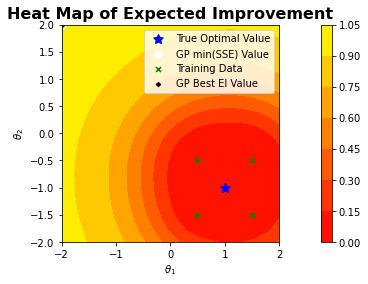

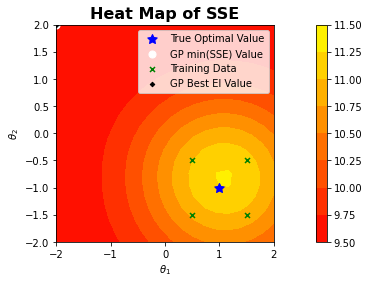

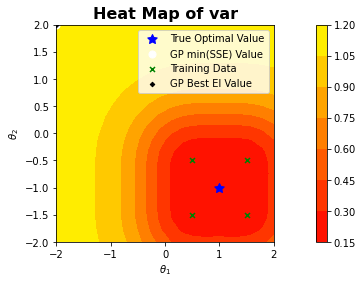

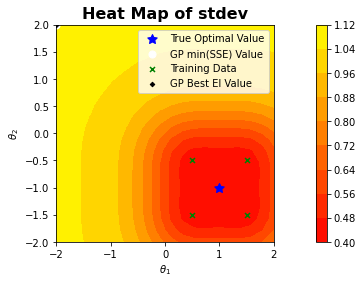

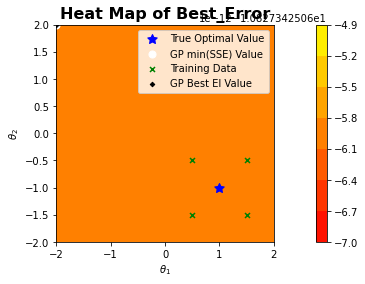

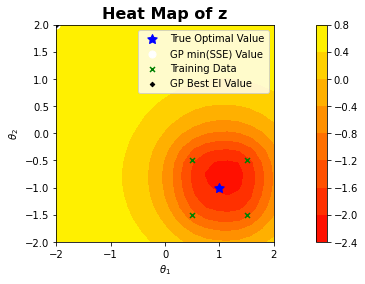

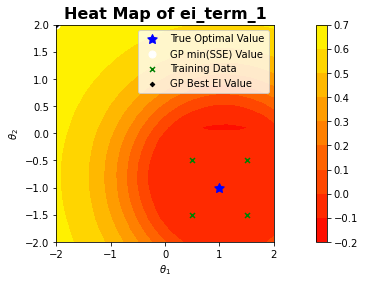

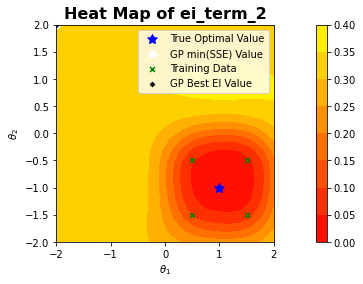

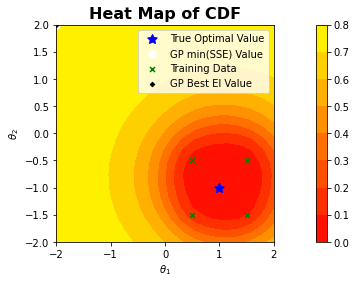

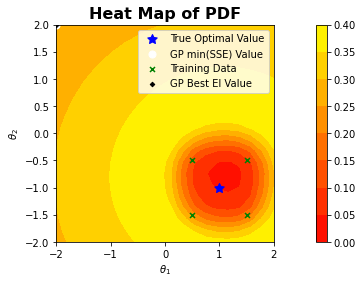

BO Iteration =  2
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.91621578 -1.00301751]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.91232989 -1.00319066]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



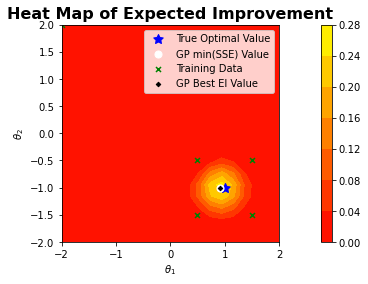

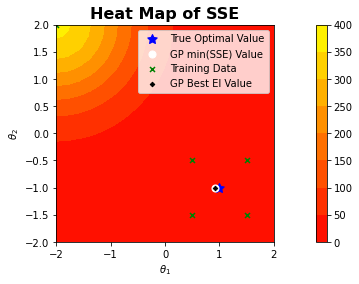

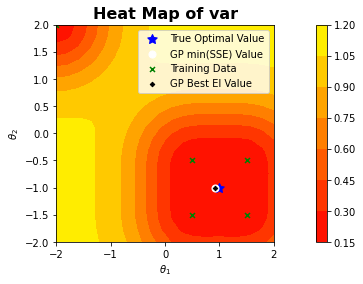

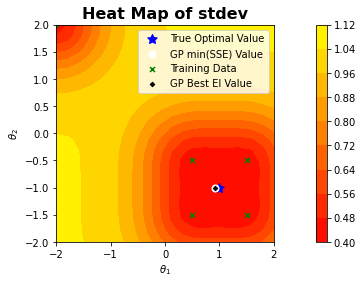

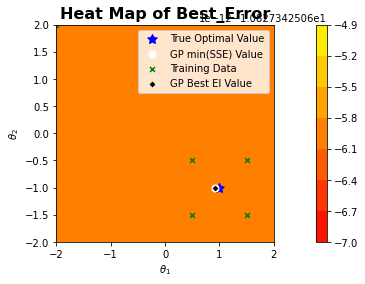

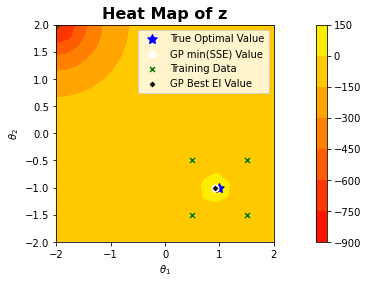

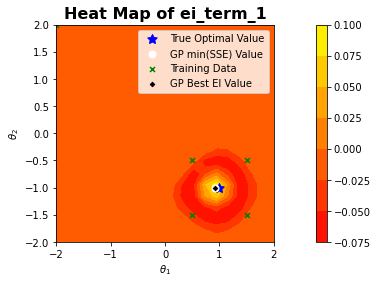

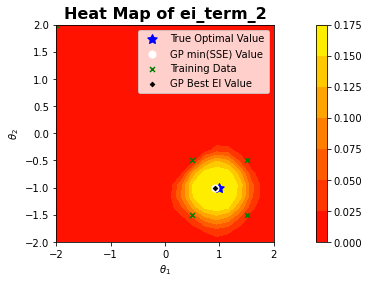

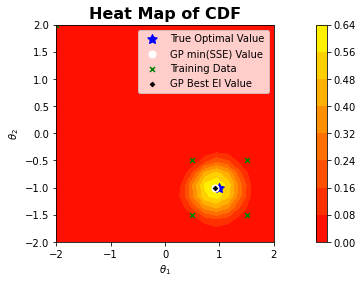

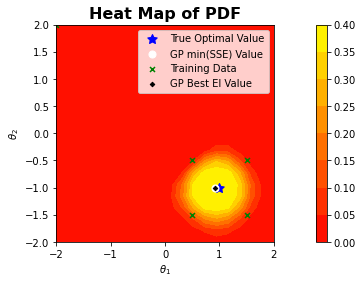

BO Iteration =  3
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.94736842 -0.94736842]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.94593706 -1.00191056]
Argmin Theta_Opt_GP =  [ 0.94736842 -0.94736842] 



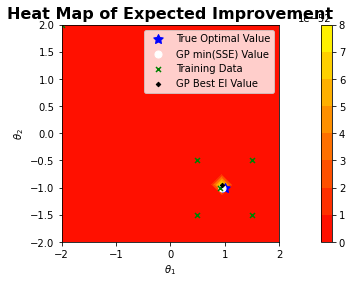

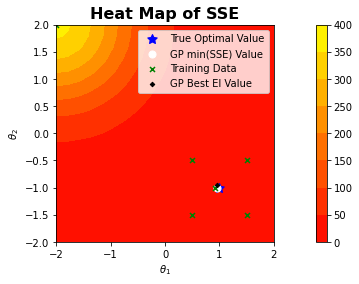

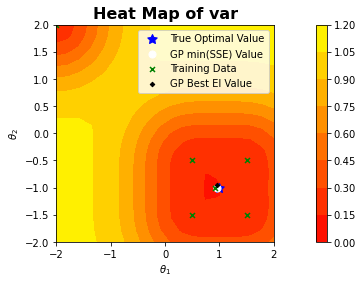

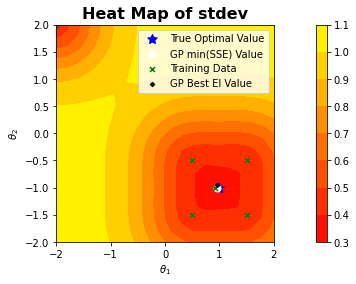

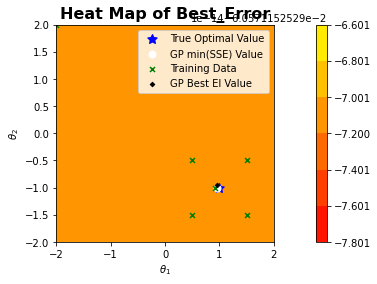

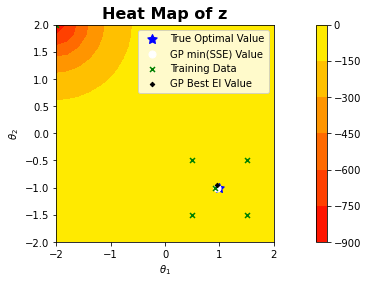

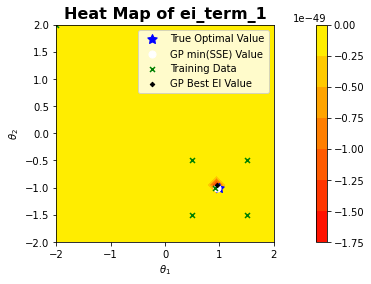

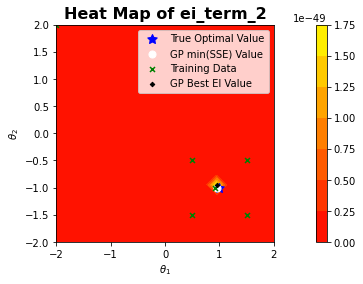

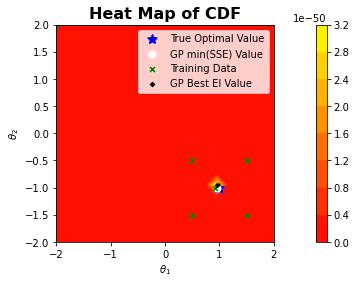

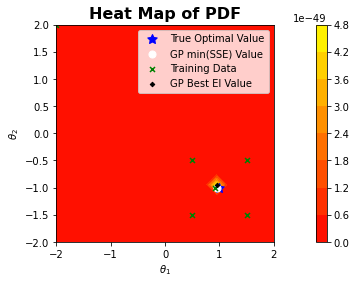

(array([ 0.94736842, -0.94736842]), array([ 0.94593706, -1.00191056]))


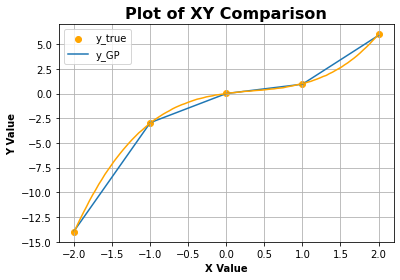

Magnitude of SSE given Theta_Opt =  [ 0.94593706 -1.00191056] is 2.3221e-02


In [6]:
##Objective function = SSE
##USING SCIPY METHOD
##Uses 4 Set Training points

#Set 4 Point Training data, Model, and Likelihood
from bo_functions import create_sse_data
obj = "obj"
T1_min = np.min(Theta1)
T1_max = np.max(Theta1)
T2_min = np.min(Theta2)
T2_max = np.max(Theta2)
# train_T = torch.tensor([[T1_min,T2_min],[T1_min,T2_max],[T1_max,T2_min],[T1_max,T2_max]])
train_T = torch.tensor(np.array([[0.5,-1.5],[0.5,-0.5],[1.5,-1.5],[1.5,-0.5]]))

train_sse = create_sse_data(q,train_T,Xexp,Yexp, obj)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_sse, likelihood)

for i in range(len(explore_bias)):
    BO_Results =  bo_iter(BO_iters, train_T, train_sse, p,q, theta_mesh, Theta_True, iterations, explore_bias[i], Xexp, Yexp,obj, verbose)
    print(BO_Results)
    
    q_y = 3
    y_GP_input = np.zeros((n,3))
    for j in range(n):
        y_GP_input[j] = np.array([BO_Results[1][0],BO_Results[1][1],Xexp[j]])

    X_line = np.linspace(-2,2,100)
    y_true = calc_y_exp(Theta_True, X_line, noise_std, noise_mean=0)

    y_GP_Opt = create_y_data(q_y,y_GP_input)

    title = "XY Comparison"
    plot_xy(X_line,Xexp, Yexp, y_GP_Opt,y_true,title)

    Error_mag = np.sum((y_GP_Opt-Yexp)**2)
    print("Magnitude of SSE given Theta_Opt = ",BO_Results[1], "is", "{:.4e}".format(Error_mag))

BO Iteration =  1
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 1.23791514 -1.77267784]
Argmax Theta Best =  [ 1.15789474 -1.78947368]
Scipy Theta Opt =  [ 1.23791499 -1.77267742]
Argmin Theta_Opt_GP =  [ 1.15789474 -1.78947368] 



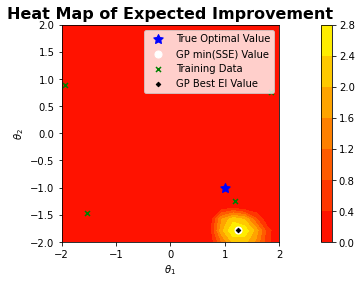

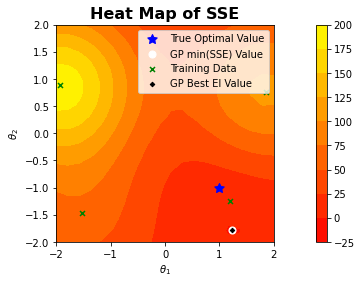

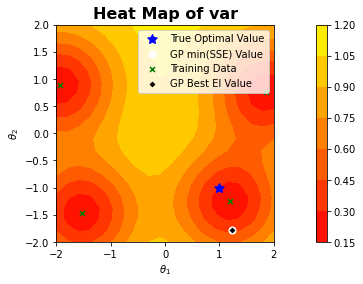

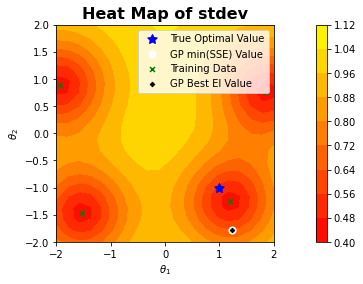

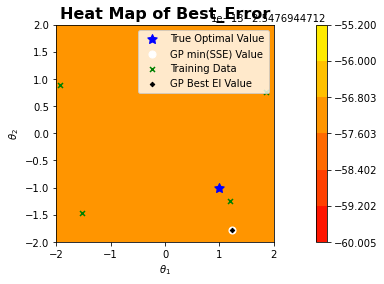

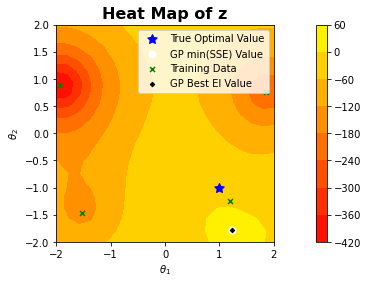

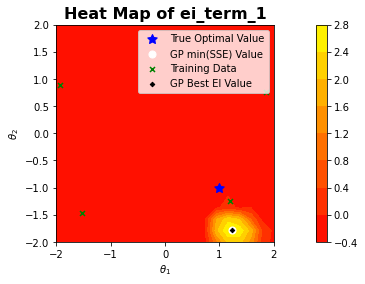

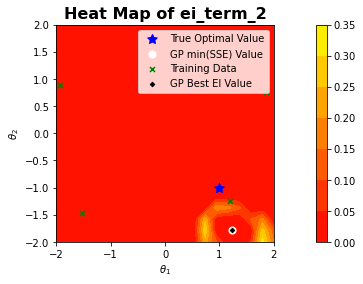

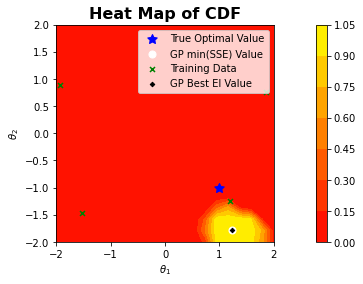

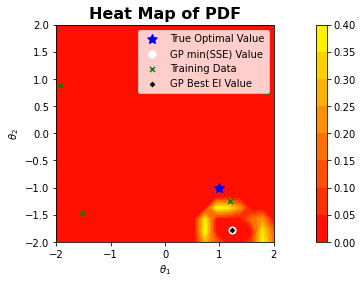

BO Iteration =  2
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.73684211 -1.15789474]
Argmax Theta Best =  [ 0.73684211 -1.15789474]
Scipy Theta Opt =  [ 0.90281477 -1.14418079]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



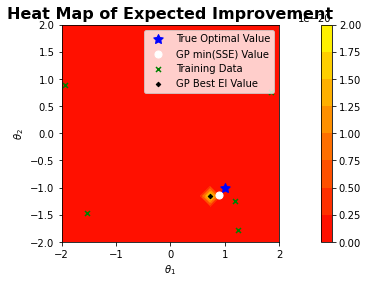

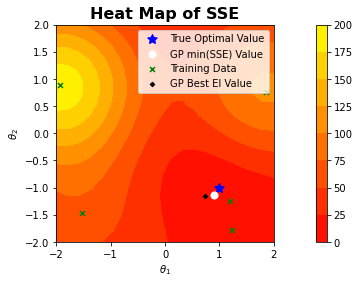

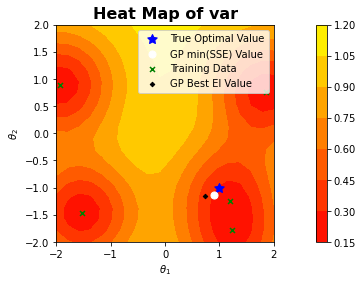

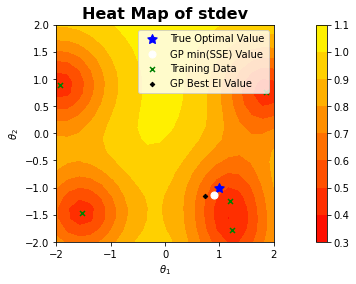

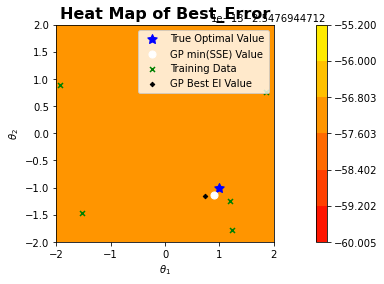

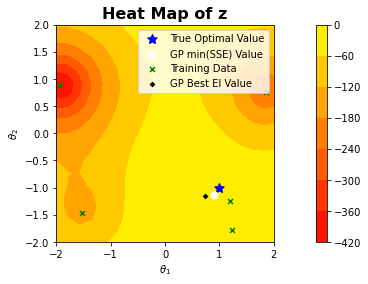

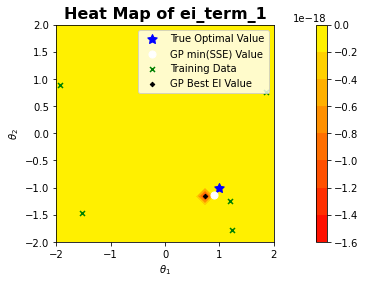

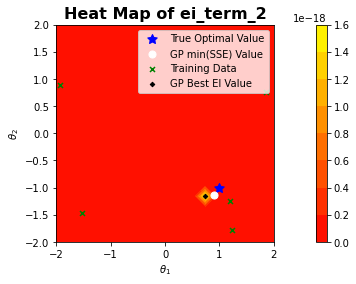

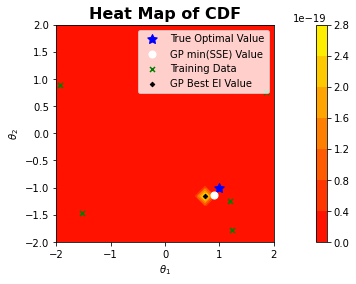

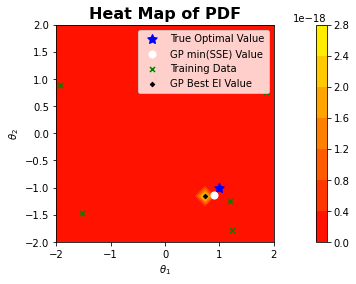

BO Iteration =  3
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.73683137 -1.15786223]
Argmax Theta Best =  [ 0.73684211 -1.15789474]
Scipy Theta Opt =  [ 0.71765359 -1.09131933]
Argmin Theta_Opt_GP =  [ 0.73684211 -1.15789474] 



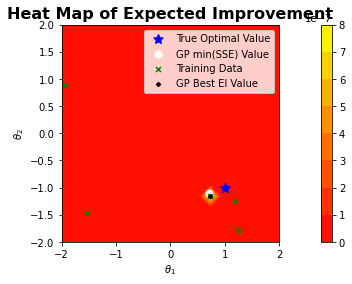

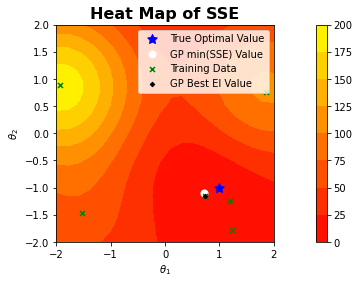

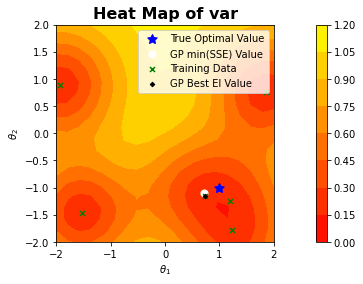

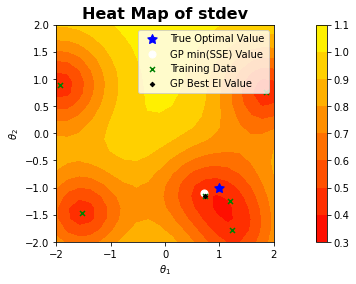

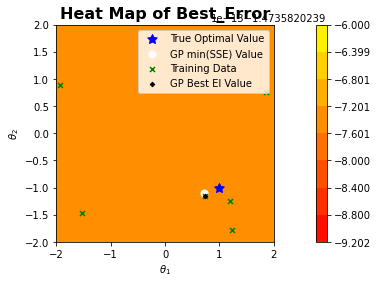

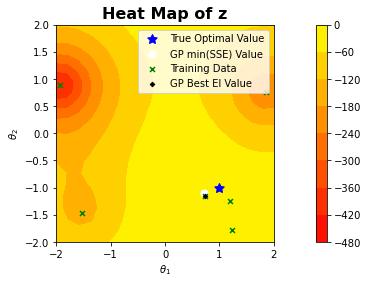

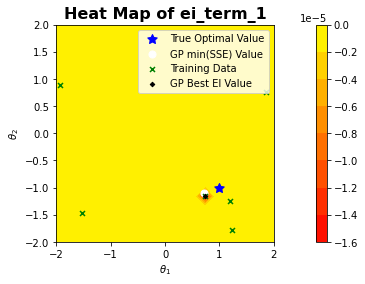

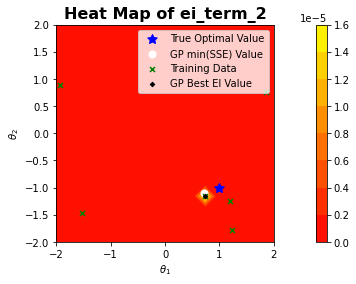

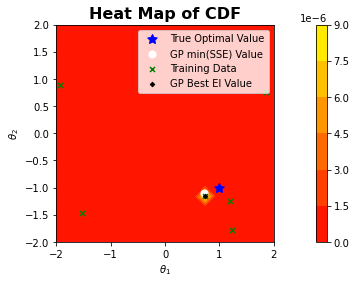

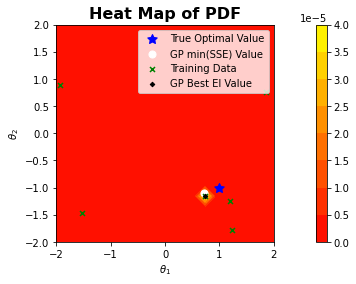

(array([ 0.73683137, -1.15786223]), array([ 0.71765359, -1.09131933]))


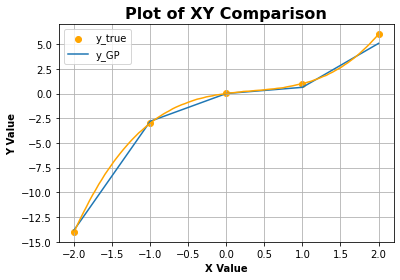

Magnitude of SSE given Theta_Opt =  [ 0.71765359 -1.09131933] is 1.0270e+00
BO Iteration =  1
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 1.23791527 -1.77267822]
Argmax Theta Best =  [ 1.15789474 -1.78947368]
Scipy Theta Opt =  [ 1.23791499 -1.77267742]
Argmin Theta_Opt_GP =  [ 1.15789474 -1.78947368] 



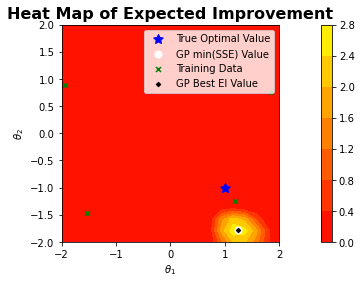

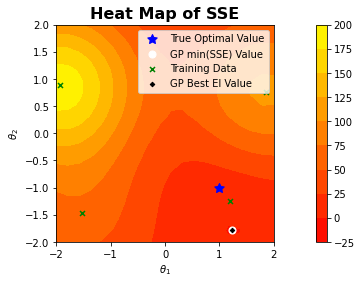

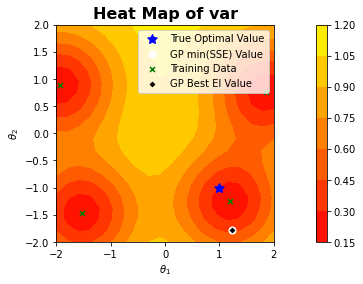

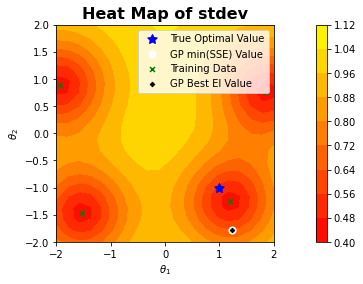

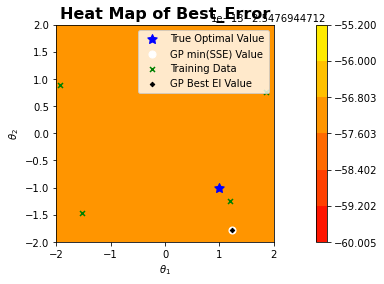

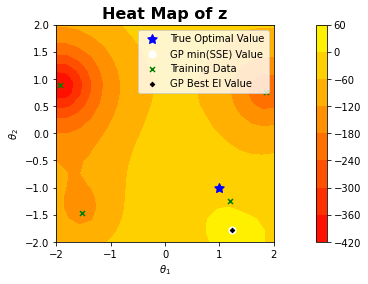

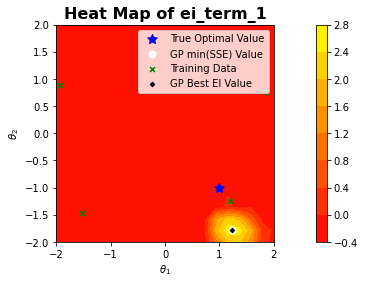

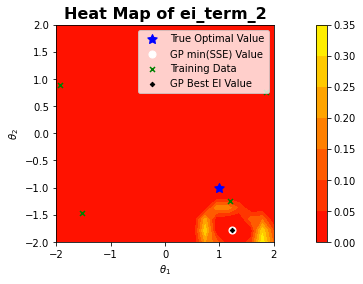

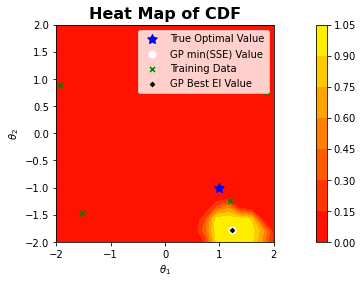

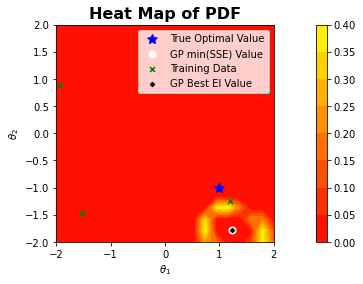

BO Iteration =  2
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.73684211 -1.15789474]
Argmax Theta Best =  [ 0.73684211 -1.15789474]
Scipy Theta Opt =  [ 0.90281449 -1.14418049]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



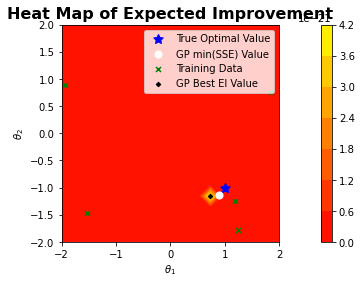

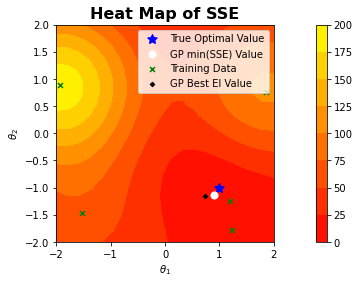

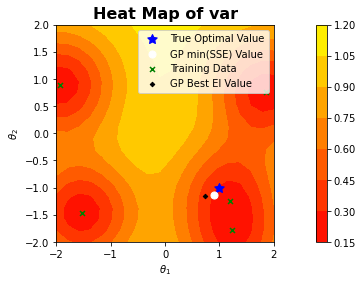

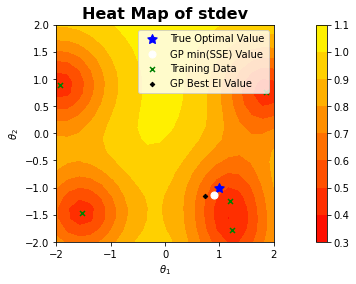

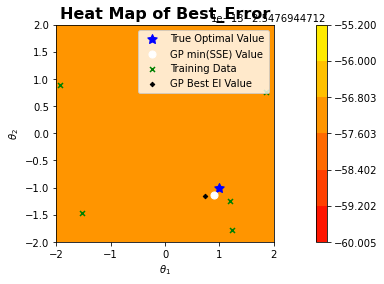

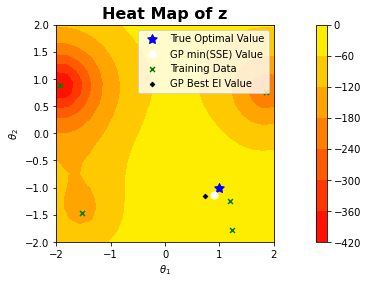

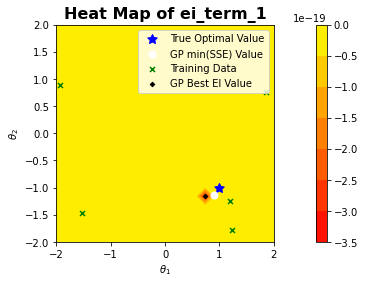

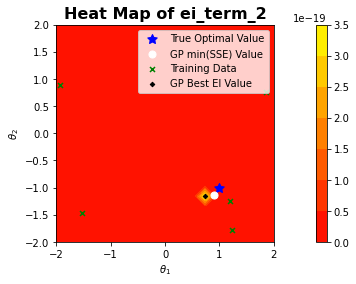

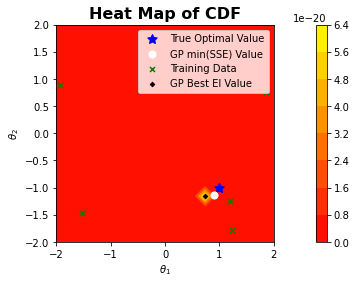

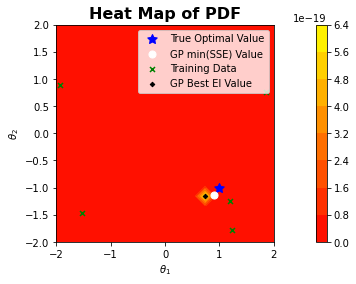

BO Iteration =  3
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.73683846 -1.15788405]
Argmax Theta Best =  [ 0.73684211 -1.15789474]
Scipy Theta Opt =  [ 0.7176536  -1.09131914]
Argmin Theta_Opt_GP =  [ 0.73684211 -1.15789474] 



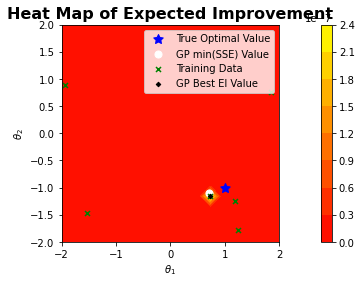

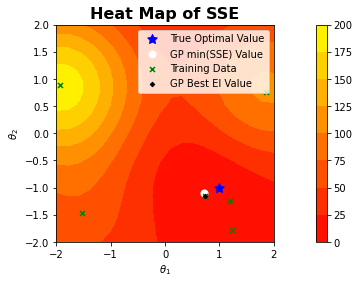

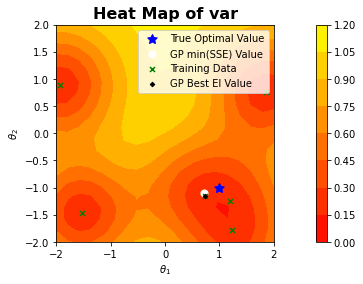

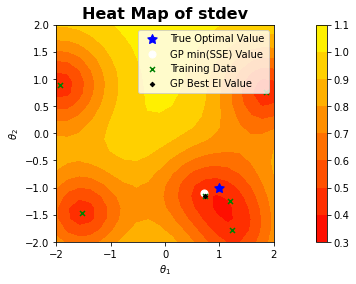

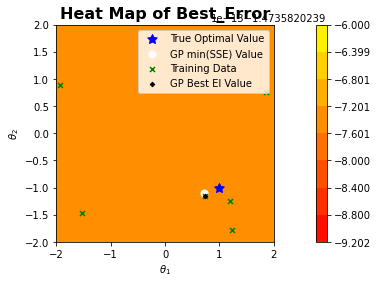

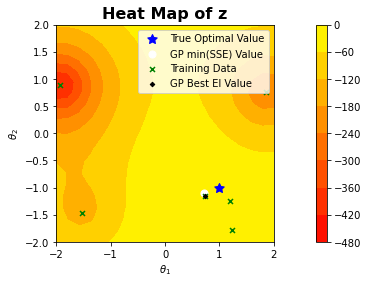

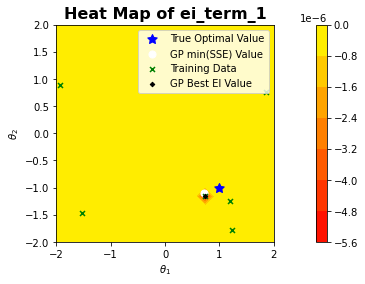

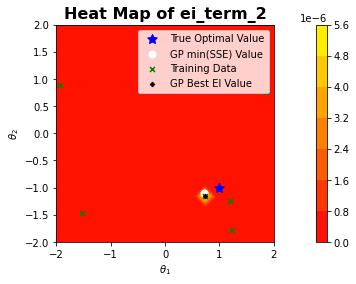

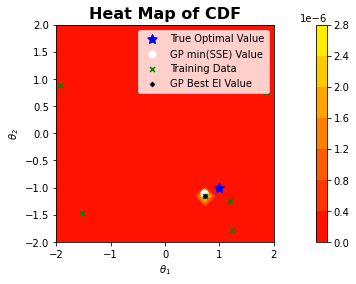

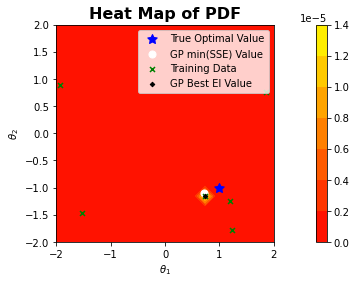

(array([ 0.73683846, -1.15788405]), array([ 0.7176536 , -1.09131914]))


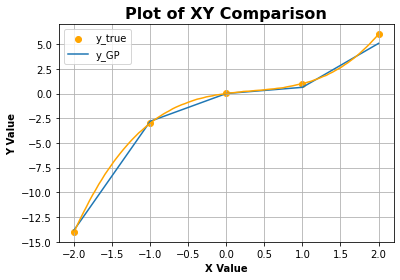

Magnitude of SSE given Theta_Opt =  [ 0.7176536  -1.09131914] is 1.0270e+00
BO Iteration =  1
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 1.23791808 -1.77268694]
Argmax Theta Best =  [ 1.15789474 -1.78947368]
Scipy Theta Opt =  [ 1.23791499 -1.77267742]
Argmin Theta_Opt_GP =  [ 1.15789474 -1.78947368] 



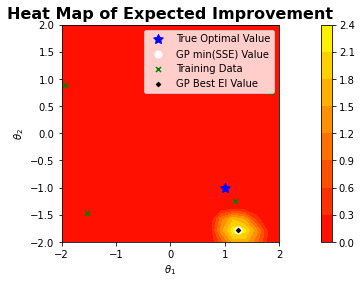

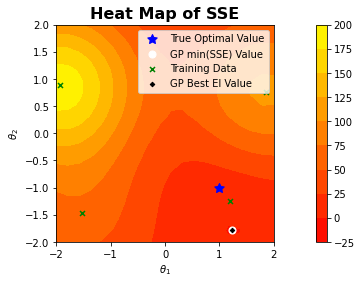

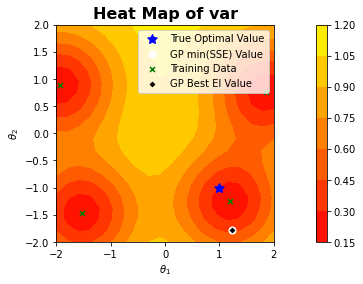

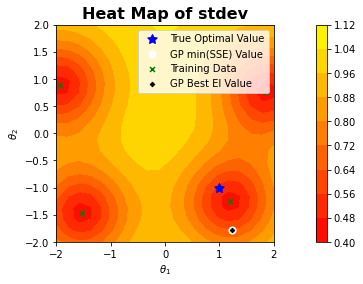

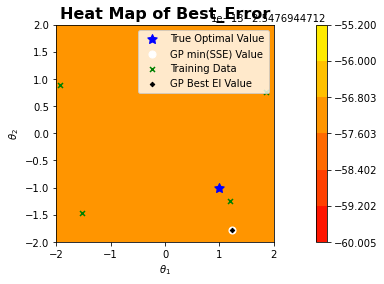

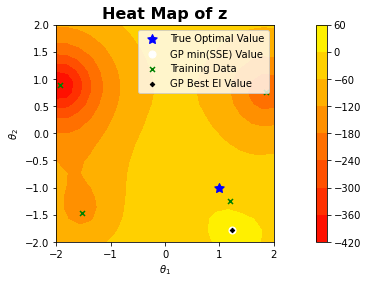

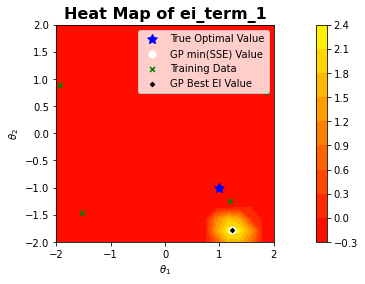

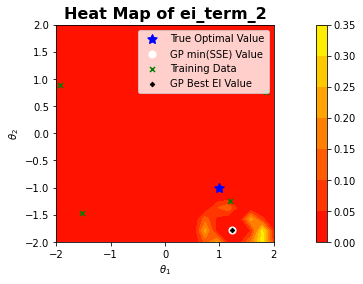

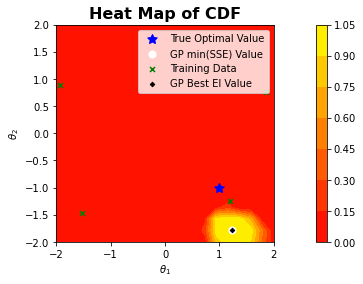

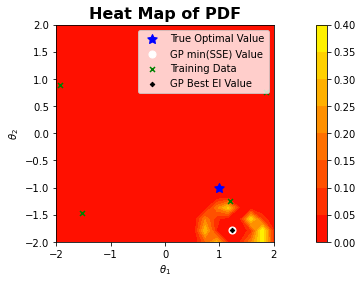

BO Iteration =  2
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.73684211 -1.15789474]
Argmax Theta Best =  [ 0.73684211 -1.15789474]
Scipy Theta Opt =  [ 0.90280856 -1.14417343]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



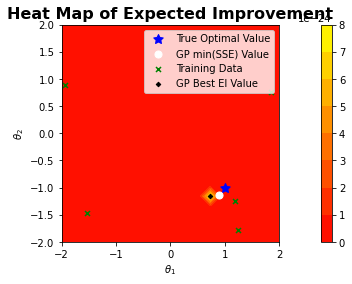

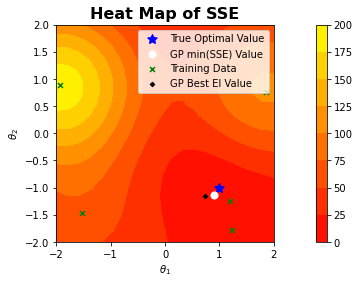

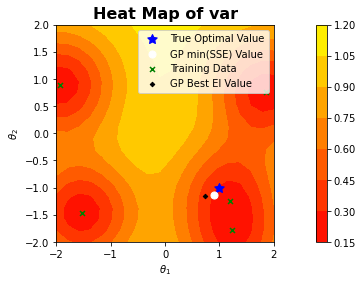

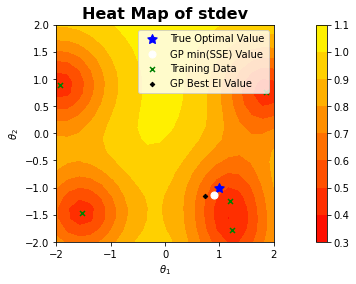

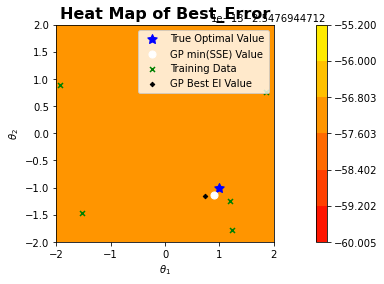

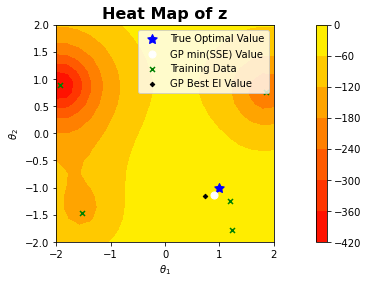

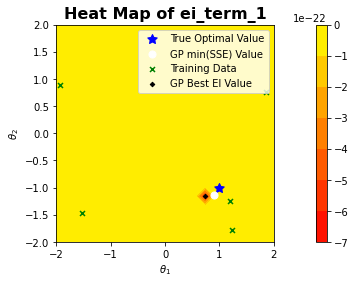

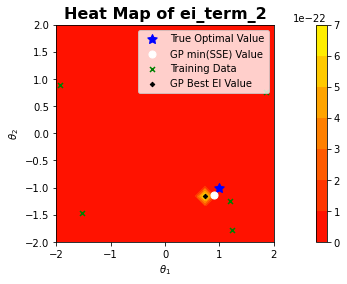

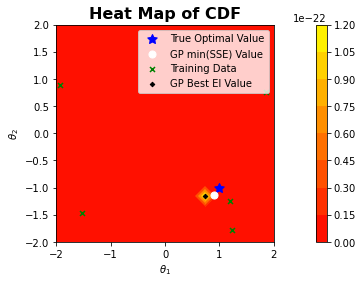

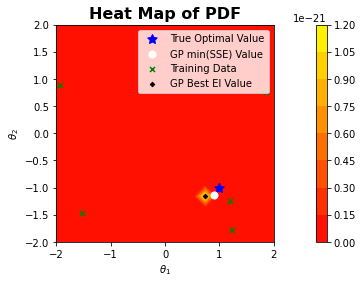

BO Iteration =  3
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.73684211 -1.15789474]
Argmax Theta Best =  [ 0.73684211 -1.15789474]
Scipy Theta Opt =  [ 0.71765323 -1.09131514]
Argmin Theta_Opt_GP =  [ 0.73684211 -1.15789474] 



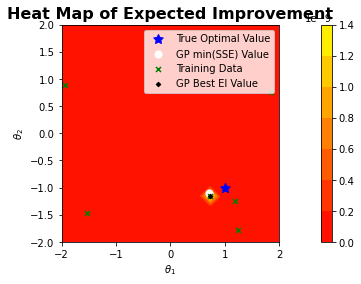

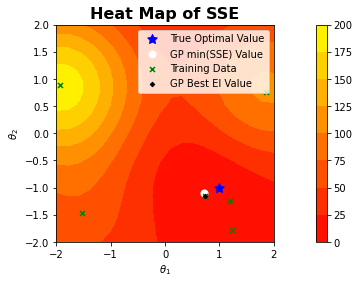

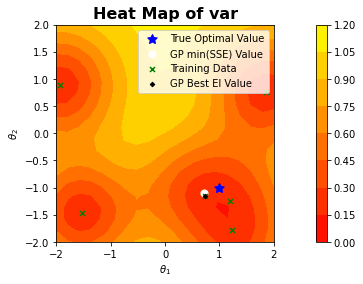

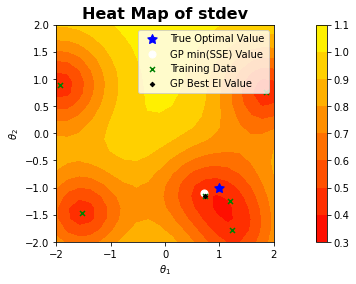

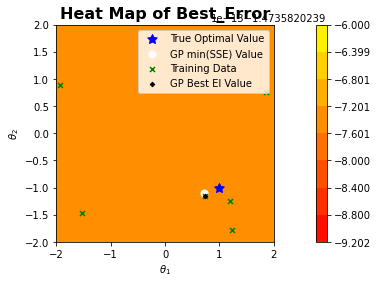

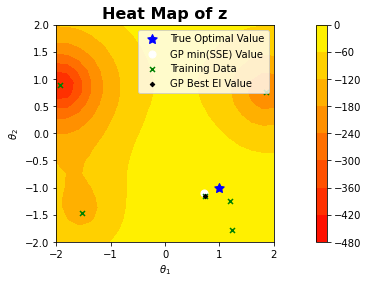

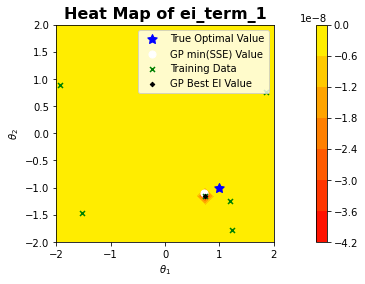

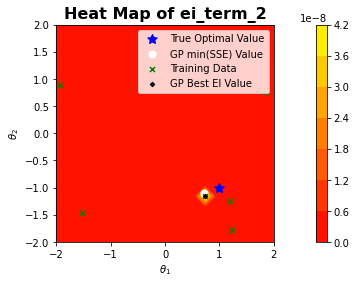

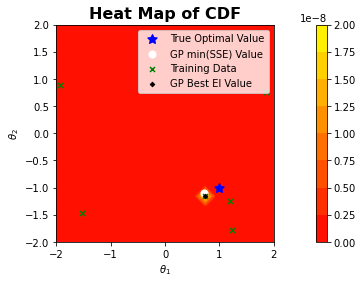

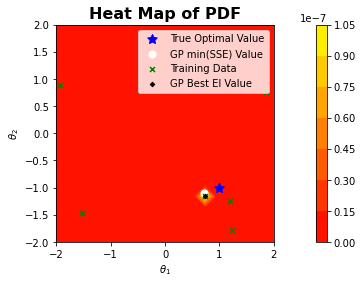

(array([ 0.73684211, -1.15789474]), array([ 0.71765323, -1.09131514]))


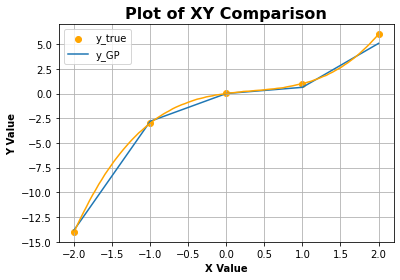

Magnitude of SSE given Theta_Opt =  [ 0.71765323 -1.09131514] is 1.0270e+00


In [7]:
##Objective function = SSE
##USING SCIPY METHOD
##Uses 4 LHS Training points

#Set 4 Point Training data, Model, and Likelihood
#OR Pull training data from CSV
train_data_doc = "train_2_in_data.csv"
train_data = np.array(pd.read_csv(train_data_doc, header=0,sep=","))
train_T = torch.tensor(train_data[:,1:3])
train_sse = torch.tensor(train_data[:,3])
t =len(train_T) #Desired number of training points
t = 4
obj = "obj"
train_T = train_T[0:t]
train_sse = train_sse[0:t]

# BO_iters=10
# verbose= False

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_sse, likelihood)

from bo_functions import train_GP_model
train_GP_model(model, likelihood, train_T, train_sse, iterations, verbose=False)

for i in range(len(explore_bias)):
    BO_Results =  bo_iter(BO_iters, train_T, train_sse, p,q, theta_mesh, Theta_True, iterations, explore_bias[i], Xexp, Yexp,obj, verbose)
    print(BO_Results)
    
    q_y = 3
    y_GP_input = np.zeros((n,3))
    for j in range(n):
        y_GP_input[j] = np.array([BO_Results[1][0],BO_Results[1][1],Xexp[j]])

    X_line = np.linspace(-2,2,100)
    y_true = calc_y_exp(Theta_True, X_line, noise_std, noise_mean=0)

    y_GP_Opt = create_y_data(q_y,y_GP_input)

    title = "XY Comparison"
    plot_xy(X_line,Xexp, Yexp, y_GP_Opt,y_true,title)

    Error_mag = np.sum((y_GP_Opt-Yexp)**2)
    print("Magnitude of SSE given Theta_Opt = ",BO_Results[1], "is", "{:.4e}".format(Error_mag))